Elite Scientist 
1. Muhammad Dhiaz Rafilianza
2. Nisrina Dinda Dhamayanti

> ## Latar Belakang
Washington, D.C. adalah ibu kota Amerika Serikat. Populasi Penduduk di Washington, D.C. mendekati 700.000 orang, dan semakin berkembang sejak tahun 2000 setelah penurunan populasi selama setengah abad. Kota ini sangat terpisah dan memiliki biaya hidup yang tinggi. Pada tahun 2017, harga rata-rata satu rumah keluarga di distrik tersebut adalah $649.000. 
Dataset diperoleh dari [Kaggle](https://www.kaggle.com/christophercorrea/dc-residential-properties)

Misi Utama dari project ini adalah membuat model machine learning yang dapat memprediksi harga sehingga kejadian underpricing dan overpricing dapat diminimalisir.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhQa-_k6-C4a8BJvzLxl3pUF12SloRqnuHDypYTTzjEg0pDaZKlRqU
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_properties = pd.read_csv('/content/drive/MyDrive/FinPro PWDK/DC_Properties.csv')
df_address = pd.read_csv('/content/drive/MyDrive/FinPro PWDK/raw_address_points.csv')
df_census = pd.read_csv('/content/drive/MyDrive/FinPro PWDK/raw_census_tracts_in_2010.csv')
df_condominium = pd.read_csv('/content/drive/MyDrive/FinPro PWDK/raw_condominium_data.csv')
df_residential = pd.read_csv('/content/drive/MyDrive/FinPro PWDK/raw_residential_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_properties.columns

In [ ]:
df_condominium.columns

In [ ]:
df_residential.columns

In [ ]:
df_properties.drop('Unnamed: 0',axis=1, inplace=True)

Dari Dataset DC Properties, terdapat 158957 baris data mengenai perumahan yang tersedia di kota tersebut

*   BATHRM - Jumlah kamar mandi yang terdapat dalam suatu hunian dengan fitur kamar mandi yang lengkap
*   HF_BATHRM - Jumlah kamar mandi yang terdapat dalam suatu hunian tanpa fitur bathub atau showe
*   HEAT - Jenis Heater yang terdapat dalam suatu hunian
*   AC - ada atau tidaknya fasilitas pendingin ruangan/AC dalam suatu hunian
*   NUM_UNITS - Jumlah Unit
*   ROOMS - Jumlah Ruangan
*   BEDRM - Jumlah Kamar Tidur 
*  AYB - Waktu paling awal bagian utama bangunan dibangun 
*   YR_RMDL - Tahun Properti 
*   EYB - Tahun perbaikan dari properti
*   STORIES - Jumlah lantai di hunian utama
*   SALEDATE - Tanggal penjualan terbaru
*   PRICE - Harga penjualan terbaru
*   QUALIFIED - Kualifikasi dari properti 
*   SALE_NUM - Nomor Penjualan
*   GBA - Luas bangunan kotor dalam meter persegi
*   BLDG_NUM - Nomor Hunian dalam suatu properi
*   STYLE - Style hunian
*   STRUCT - Struktur hunian
*   GRADE - Kelas dari suatu hunian
*   CNDTN - Kondisi dari suatu hunian
*   EXTWALL - Bahan yang dipakai untuk dinding luar
*   ROOF - tipe atap yang digunakan
*   INTWALL - Bahan yang dipakai untuk dinding dalam
*   KITCHEN - Jumlah dapur dalam suatu hunian
*   FIREPLACES - Jumlah perapian dalam suatu hunian
*   USECODE - Kode penggunaan properti
*   LANDAREA - Luas tanah properti dalam meter persegi
*   GIS_LAST_MOD_DTM - Tanggal modifikasi terakhir data
*   SOURCE - Sumber raw data dari raw data residential atau condominium
*   CMPLX_NUM - Nomor kompleks
*   LIVING_GBA - Luas bangunan kotor dalam meter persegi
*   FULLADDRESS - Alamat jalan lengkap
*   CITY - Letak hunian dalam kota
*   STATE - Letak hunian dalam negara bagian
*   ZIPCODE - kode pos hunian
*   NATIONALGRID - Alamat hunian berdasarkan koordinat grid spasial
*   LATITUDE - latitude 
*   LONGITUDE - longitude
*   ASSESSMENT_NBHD - ID hunian dalam lingkungan/daerah sekitarnya
*   ASSESSMENT_SUBNBHD - ID hunian dalam sublingkungan sekitarnya
*   CENSUS_TRACT - tract sensus
*   CENSUS_BLOCK - blok sensus
*   WARD - kelurahan yang mana tiap distrik dibagi menjadi delapan kelurahan dengan masing-masing memiliki jumlah penduduk sebanyak 75.000
*   SQUARE - square dari SSL
*   X - longitude
*   Y - latitude
*   QUADRANT - kuadran dari kota (NE,SE,SW,NW)

> ## Feature Analysis

The first step of this project is to identify our datasets and its features. Right now , we would analyze the variable types and condition of our datasets. This would give us our initial understanding , and a sense of which dataset should we use and which variables are irrelevant.


In [ ]:
df_properties.shape

(158957, 48)

In [ ]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 48 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BATHRM              158957 non-null  int64  
 1   HF_BATHRM           158957 non-null  int64  
 2   HEAT                158957 non-null  object 
 3   AC                  158957 non-null  object 
 4   NUM_UNITS           106696 non-null  float64
 5   ROOMS               158957 non-null  int64  
 6   BEDRM               158957 non-null  int64  
 7   AYB                 158686 non-null  float64
 8   YR_RMDL             80928 non-null   float64
 9   EYB                 158957 non-null  int64  
 10  STORIES             106652 non-null  float64
 11  SALEDATE            132187 non-null  object 
 12  PRICE               98216 non-null   float64
 13  QUALIFIED           158957 non-null  object 
 14  SALE_NUM            158957 non-null  int64  
 15  GBA                 106696 non-nul

In [ ]:
df_properties.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,9.821600e+04,158957.000000,106696.000000,158957.000000,106695.000000,158957.000000,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,9.313516e+05,1.680033,1714.539889,1.000598,1.219251,2.374674,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,7.061325e+06,1.285898,880.677860,0.031622,0.621170,737.295595,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,2.400000e+05,1.000000,1190.000000,1.000000,1.000000,0.000000,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,3.999990e+05,1.000000,1480.000000,1.000000,1.000000,0.000000,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,6.520000e+05,2.000000,1966.000000,1.000000,1.000000,1.000000,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,1.374275e+08,15.000000,45384.000000,5.000000,44.000000,293920.000000,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [ ]:
df_properties['SALEDATE'] = pd.to_datetime(df_properties['SALEDATE'])

In [ ]:
df_properties.describe(include = ['O'])

,HEAT,AC,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,NATIONALGRID,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
count,158957,158957,158957,106696,106696,106696,106696,106696,106696,106696,158957,158957,106040,106051,106051,106051,158956,126406,106051,158956,158957,158720
unique,14,3,2,18,9,13,7,25,16,12,2,2,105978,1,1,105949,57,121,3848,8,3512,4
top,Forced Air,Y,U,2 Story,Row Inside,Average,Average,Common Brick,Built Up,Hardwood,2018-07-22 18:01:43,Residential,1754 STANTON TERRACE SE,WASHINGTON,DC,18S UJ 28168 01936,Old City 2,040 D Old City 2,009000 1001,Ward 6,540,NW
freq,53972,114620,82608,81137,40593,37357,58217,81068,31402,83643,106696,106696,5,106051,106051,5,15978,4403,340,23973,994,89736


In [ ]:
list_item = []
for col in df_properties.columns:
    list_item.append([col, df_properties[col].dtype, df_properties[col].isna().sum(), round((df_properties[col].isna().sum()/len(df_properties[col]))*100,2),
                      df_properties[col].nunique(), list(df_properties[col].unique()[:5])])

df_desc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)
df_desc

> ## Data Cleansing

Before EDA can even began , we need to make sure our data is clean.
<br>
This step includes removing irrelevant variables, Removing Null Values , and Removing Outlier

In [ ]:
# Drop redundant columns 
df_properties.drop(['X', 'Y','CITY','STATE'], axis = 1,inplace=True)

In [ ]:
#change column AC where the value is 0 to N
df_properties['AC'] = df_properties['AC'].str.replace('0','N')

In [ ]:
# Drop No Data Values on GRADE and HEAT columns
col_list = ['HEAT', 'GRADE']
for col in col_list:
  indexNames = df_properties[df_properties[col] == 'No Data' ].index
# Delete these row indexes from dataFrame
  df_properties.drop(indexNames , inplace=True)

In [ ]:
# Drop Nan Value at PRICE, LONGITUDE, ASSESSMENT_NBHD, ZIPCODE, WARD, LATITUDE
df_properties.dropna(subset=['PRICE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'CENSUS_TRACT','ZIPCODE', 'WARD', 'LATITUDE'],inplace=True)
df_properties = df_properties.reset_index().drop('index',axis=1)

In [ ]:
#Delete Default Values in STYLE, STRUCT, EXTWALL, INTWALL, CNDTN
def deldefaultval(x):
  for i in x:
    indexNames = df_properties[df_properties[i] == 'Default' ].index
    # Delete these row indexes from dataFrame
    df_properties.drop(indexNames , inplace=True)

deldefaultval(['STYLE','STRUCT','EXTWALL','INTWALL','CNDTN'])

In [ ]:
#“YR RMDL” have about one third empty and this must be because not all the houses have been remodeled. While dropping is not always the best, the solution for this would be type conversion so that it is either a yes or a no as to whether remodeled or not
df_properties['YR_RMDL_CAT'] = np.where(pd.notnull(df_properties['YR_RMDL']), 'Y', 'N')
df_properties[['YR_RMDL','YR_RMDL_CAT']]

In [ ]:
df_properties[df_properties['CMPLX_NUM'].isna()]

In [ ]:
cols = ['PRICE'] # one or more

Q1 = df_properties[cols].quantile(0.25)
Q3 = df_properties[cols].quantile(0.75)
IQR = Q3 - Q1

df_properties = df_properties[~((df_properties[cols] < (Q1 - 1.5 * IQR)) |(df_properties[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_properties.reset_index().drop('index',axis=1)

In [ ]:
df_properties = df_properties[df_properties['PRICE']>=100000]
cols = ['PRICE'] # one or more

Q1 = df_properties[cols].quantile(0.25)
Q3 = df_properties[cols].quantile(0.75)
IQR = Q3 - Q1

df_properties = df_properties[~((df_properties[cols] < (Q1 - 1.5 * IQR)) |(df_properties[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_properties

In [ ]:
df_combined = df_properties.merge(df_census,left_on='CENSUS_TRACT',right_on ='TRACT',how='left')
df_combined.head(1)

In [ ]:
df_combined[df_combined['EYB'].isna()]

In [ ]:
df_combined[df_combined['AYB'].isna()]

In [ ]:
df_combined.shape


##Exploratory Data Analysis

Langkah pertama adalah melakukan seleksi fitur dengan menganalisis hubungan antara target dan label

#### **Target**
Target untuk model machine learning yang akan dibuat adalah kolom/fitur Price yang mana kolom Price menunjukan harga penjualan terbaru dari suatu hunian residential atapun condominium.


This part concentrates on relationships among variables. Separate analysis will be conducted by data type, numerical and categorical, and then another for both of them together. For numerical types, correlation matrix will be drawn not only to find relationship with dependent variable but also to catch multicollinearity patterns. For categorical types, box plots will be used to see whether each category has an ability to divide house prices and what values are useful if so. Box plot also can help to decide whether to reduce number of values in a category.

Lakukan uji asusmsi normalitas pada variabel harga Rumah (PRICE)

In [ ]:
# D'Agostino and Pearson Test
# Menguji asumsi normalitas variabel Price
from scipy.stats import normaltest
normaltest(df_combined['PRICE'])

In [ ]:
dp_statistic, df_pvalue = normaltest(df_combined['PRICE'])

if df_pvalue > 0.05:
  print(f'p-value : {df_pvalue}.So, we assume a normal distribution')
else:
  print(f'p-value : {df_pvalue}.So, we assume do not a normal distribution')

In [ ]:
# Check residential Price distribution
df_res = df_combined[df_combined['SOURCE']=='Residential']
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot()
im2 = sns.distplot(df_res['PRICE'])
ax2.set_title('Residential Price Distribution')

# Check Condominium Price Distribution
df_con = df_combined[df_combined['SOURCE']=='Condominium']
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot()
im2 = sns.distplot(df_con['PRICE'])
ax2.set_title('Condominium Price Distribution')

In [ ]:
df_use = df_combined[['AYB','BATHRM','HF_BATHRM','EYB','HEAT','AC','WARD','STYLE','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','KITCHENS','FIREPLACES','LANDAREA','NUM_UNITS','ROOMS','BEDRM','STORIES','GBA','LIVING_GBA','QUADRANT','H0010001','P0010001','FAGI_MEDIAN_2015','PRICE','ASSESSMENT_NBHD','SOURCE','LATITUDE','LONGITUDE']]
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85340 entries, 0 to 85339
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AYB               85258 non-null  float64
 1   BATHRM            85340 non-null  int64  
 2   HF_BATHRM         85340 non-null  int64  
 3   EYB               85340 non-null  int64  
 4   HEAT              85340 non-null  object 
 5   AC                85340 non-null  object 
 6   WARD              85340 non-null  object 
 7   STYLE             49336 non-null  object 
 8   STRUCT            49336 non-null  object 
 9   GRADE             49336 non-null  object 
 10  CNDTN             49336 non-null  object 
 11  EXTWALL           49336 non-null  object 
 12  ROOF              49336 non-null  object 
 13  INTWALL           49336 non-null  object 
 14  KITCHENS          49335 non-null  float64
 15  FIREPLACES        85340 non-null  int64  
 16  LANDAREA          85340 non-null  int64 

In [ ]:
df_use.isna().sum()

In [ ]:
df_use.dropna(subset=['QUADRANT'],inplace=True)
df_use = df_use.reset_index().drop('index',axis=1)

In [ ]:
df_use.isna().sum()

 #### Correlation
 
 Use Spearman Correlation to see the Relationship between Variables

In [ ]:

plt.figure(figsize=(25, 18))
heatmap = sns.heatmap(df_use.corr('spearman'), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
df_res = df_combined[['BATHRM','HF_BATHRM','HEAT','AC','WARD','STYLE','QUALIFIED','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','KITCHENS','FIREPLACES','LANDAREA','NUM_UNITS','ROOMS','BEDRM','STORIES','GBA','QUADRANT','H0010001','P0010001','FAGI_MEDIAN_2015','PRICE','ASSESSMENT_NBHD','SOURCE','YR_RMDL_CAT','LATITUDE','LONGITUDE']]

In [ ]:
df_res = df_res[df_res['SOURCE']=='Residential']
df_res.info()

In [ ]:
df_res['STORIES']= df_res['STORIES'].fillna(2)

In [ ]:
df_res.isna().sum()

In [ ]:
df_res.dropna(subset=['QUADRANT','KITCHENS'],inplace=True)
df_res = df_res.reset_index().drop('index',axis=1)

In [ ]:
df_res.isna().sum()

In [ ]:
df_con = df_combined[['LATITUDE','LONGITUDE','BATHRM','HF_BATHRM','HEAT','AC','WARD','STYLE','STRUCT','GRADE','QUALIFIED','CNDTN','EXTWALL','ROOF','INTWALL','KITCHENS','FIREPLACES','LANDAREA','NUM_UNITS','ROOMS','BEDRM','STORIES','LIVING_GBA','GBA','QUADRANT','H0010001','P0010001','FAGI_MEDIAN_2015','PRICE','ASSESSMENT_NBHD','SOURCE','YR_RMDL_CAT']]

In [ ]:
df_con = df_con[df_con['SOURCE']=='Condominium']
df_con.info()

In [ ]:
df_con.isna().sum()

In [ ]:
# Check GBA distribution
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot()
im2 = sns.distplot(df_res['GBA'])
ax2.set_title('Residential GBA Distribution')

# Check LIVING GBA Distribution
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot()
im2 = sns.distplot(df_con['LIVING_GBA'])
ax2.set_title('Condominium GBA Distribution')

In [ ]:
# Check distribusi median income distribution
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot()
im2 = sns.distplot(df_combined['FAGI_MEDIAN_2015'])
ax2.set_title('Median Income Distribution')

In [ ]:
# D'Agostino and Pearson Test
# Menguji asumsi normalitas variabel Price
from scipy.stats import normaltest
normaltest(df_use['FAGI_MEDIAN_2015'])

In [ ]:
dp_statistic, df_pvalue = normaltest(df_use['FAGI_MEDIAN_2015'])

if df_pvalue > 0.05:
  print(f'p-value : {df_pvalue}.So, we assume a normal distribution')
else:
  print(f'p-value : {df_pvalue}.So, we assume do not a normal distribution')

In [ ]:
# Hitung korelasi antara ROOMS dengan PRICE diasumsikan tidak memenuhi syarat parametrik
df_use[['ROOMS', 'PRICE']].corr(method = 'spearman' ) 

In [ ]:
df_use[['FAGI_MEDIAN_2015', 'PRICE']].corr(method = 'spearman' ) 

In [ ]:
# Hitung korelasi antara BATHRM dengan PRICE diasumsikan tidak memenuhi syarat parametrik
df_use[['BATHRM', 'PRICE']].corr(method = 'spearman' ) 

In [ ]:
# Hitung korelasi antara BATHRM dengan PRICE diasumsikan tidak memenuhi syarat parametrik
df_res[['GBA', 'PRICE']].corr(method = 'spearman' ) 

In [ ]:
df_con[['LIVING_GBA', 'PRICE']].corr(method = 'spearman' ) 

In [ ]:
df_use[['HF_BATHRM', 'PRICE']].corr(method = 'spearman' ) 

In [ ]:
df_use[['EYB', 'PRICE']].corr(method = 'spearman' ) 

In [ ]:
df_use[['LANDAREA', 'PRICE']].corr(method = 'spearman' ) 

In [ ]:
df_combined[['BEDRM', 'PRICE']].corr(method = 'spearman' ) 

In [ ]:
df_res[['KITCHENS', 'PRICE']].corr(method = 'spearman' ) 

In [ ]:
df_use[['KITCHENS', 'PRICE']].corr(method = 'spearman' ) 

In [ ]:
df_use[['FIREPLACES', 'PRICE']].corr(method = 'spearman' ) 

Dari beberapa QUADRANT, manakah QUADRANT yang variabel jumlah ruangan (ROOMS) memiliki korelasi terkuat dengan variabel harga rumah (PRICE)

In [ ]:
df_con['QUADRANT'].unique()

In [ ]:
corr = []
for i in df_con['QUADRANT'].unique():
    corr.append(f'{i} = ' + str(df_con[df_con['QUADRANT']==i]['ROOMS'].corr(df_con[df_con['QUADRANT']==i]['PRICE'], method = 'spearman')))
    
pd.DataFrame(data = corr, index = df_con['QUADRANT'].unique(), columns = ['Correlation Price vs Rooms']).sort_values(by = 'Correlation Price vs Rooms', ascending=False)

In [ ]:
corr = []
for i in df_res['QUADRANT'].unique():
    corr.append(f'{i} = ' + str(df_res[df_res['QUADRANT']==i]['ROOMS'].corr(df_res[df_res['QUADRANT']==i]['PRICE'], method = 'spearman')))
    
pd.DataFrame(data = corr, index = df_res['QUADRANT'].unique(), columns = ['Correlation Price vs Rooms']).sort_values(by = 'Correlation Price vs Rooms', ascending=False)

### Washington DC Map

By Plotting the Lattitude and Longitude and plot different values, we can see a consistent pattern emerging from these 3 plot

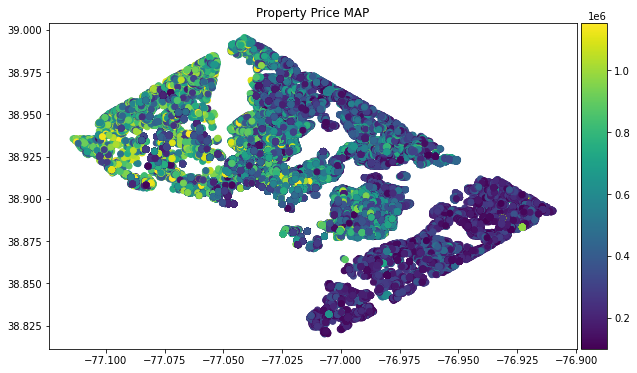

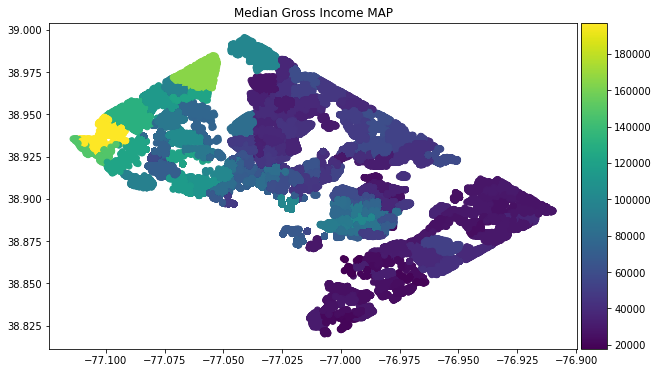

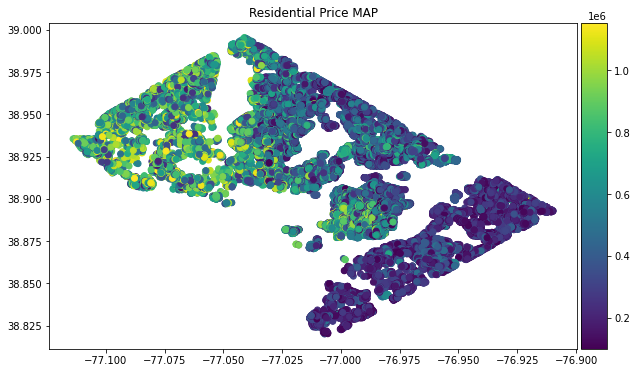

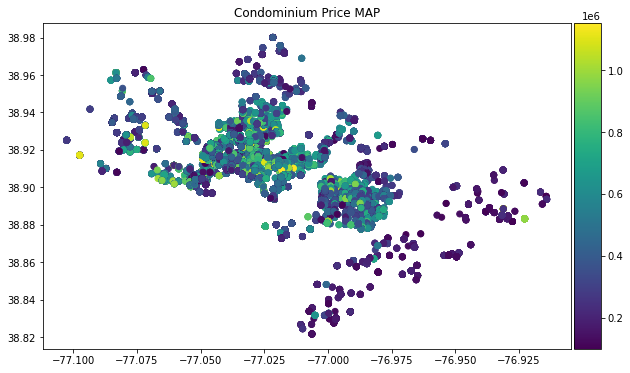

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go
import numpy as np
# First Map
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot()
im1 = ax1.scatter(df_use["LONGITUDE"], df_use['LATITUDE'], c=df_use['PRICE'])
ax1.set_title('Property Price MAP')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
# Second Map
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot()
im2 = ax2.scatter(df_use["LONGITUDE"], df_use['LATITUDE'], c=df_use['FAGI_MEDIAN_2015'])
ax2.set_title('Median Gross Income MAP')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

# Third Map
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot()
im2 = ax2.scatter(df_res["LONGITUDE"], df_res['LATITUDE'], c=df_res['PRICE'])
ax2.set_title('Residential Price MAP')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

# Fourth Map
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot()
im2 = ax2.scatter(df_con["LONGITUDE"], df_con['LATITUDE'], c=df_con['PRICE'])
ax2.set_title('Condominium Price MAP')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')



### A Closer Look

Now , we would take a closer look toward our variables and the relationship between them
<br>

Counting the frequencies of each occurance give us a better 
view of the conditions of the residental area in Washington

In [ ]:
# For Quadrant and Ward 
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
fig, ax = plt.subplots(3,1,figsize=(13,8))
sns.countplot(x='QUADRANT',data=df_res,ax=ax[0],order=df_res['QUADRANT'].value_counts().index,palette=color)
sns.countplot(x='WARD',data=df_res,ax=ax[1],order=df_res['WARD'].value_counts().index,palette=color)
sns.countplot(x='ASSESSMENT_NBHD',data=df_res,ax=ax[2],order=df_res['ASSESSMENT_NBHD'].value_counts().head(10).index,palette=color)
ax[0].set_title('Residential Count by Quadrant')
ax[1].set_title('Residential Count by WARD')
ax[2].set_title('TOP 10 Residential Count by Neighborhood')
plt.tight_layout()
plt.show()

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
fig, ax = plt.subplots(3,1,figsize=(13,8))
sns.countplot(x='QUADRANT',data=df_con,ax=ax[0],order=df_con['QUADRANT'].value_counts().index,palette=color)
sns.countplot(x='WARD',data=df_con,ax=ax[1],order=df_con['WARD'].value_counts().index,palette=color)
sns.countplot(x='ASSESSMENT_NBHD',data=df_con,ax=ax[2],order=df_con['ASSESSMENT_NBHD'].value_counts().head(10).index,palette=color)
ax[0].set_title('Condominium Count by Quadrant')
ax[1].set_title('Condominium Count by WARD')
ax[2].set_title('TOP 10 Condominium Count by Neighborhood')
plt.tight_layout()
plt.show()

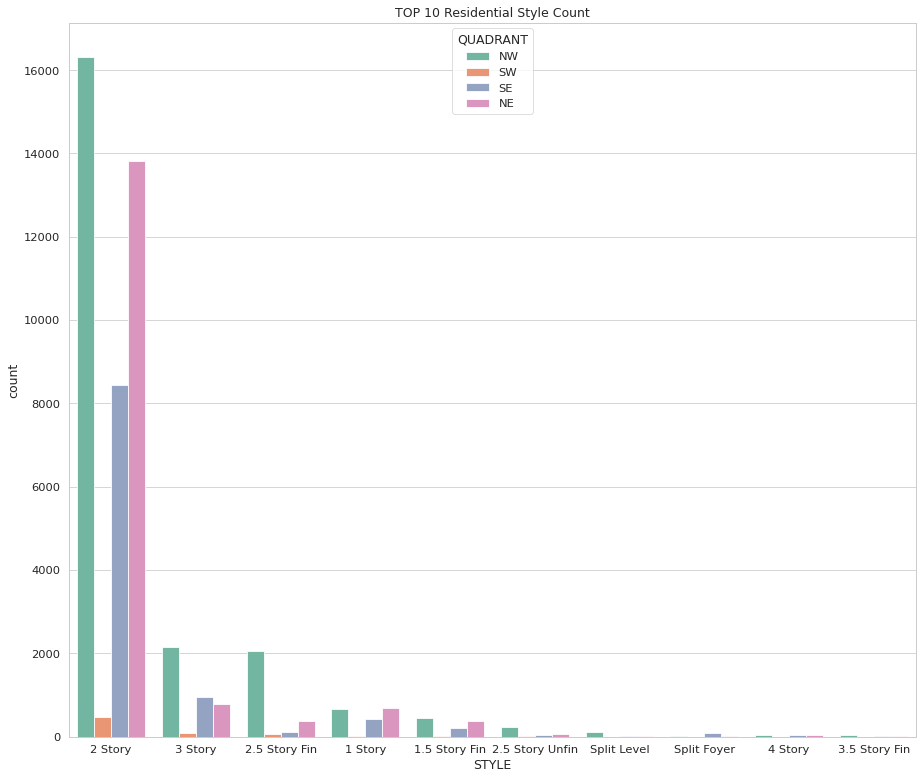

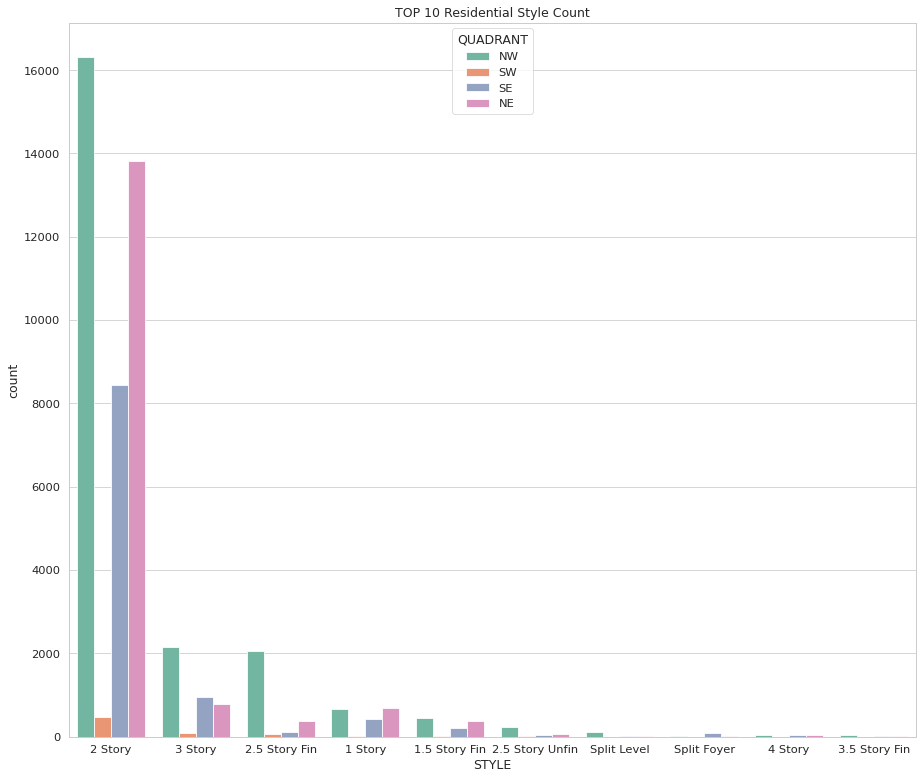

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='STYLE',data=df_res,order=df_res['STYLE'].value_counts().head(10).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 10 Residential Style Count')
plt.tight_layout()
plt.show()

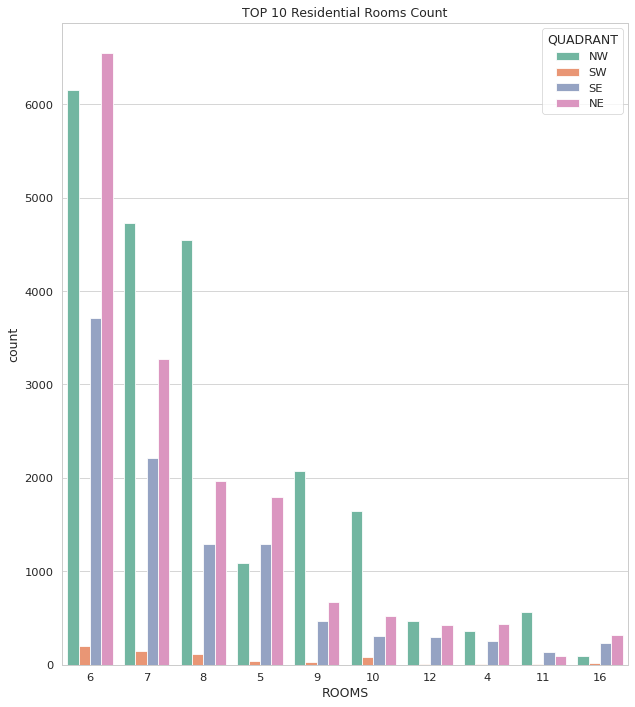

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(9,10))
sns.countplot(x='ROOMS',data=df_res,order=df_res['ROOMS'].value_counts().head(10).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 10 Residential Rooms Count')
plt.tight_layout()
plt.show()

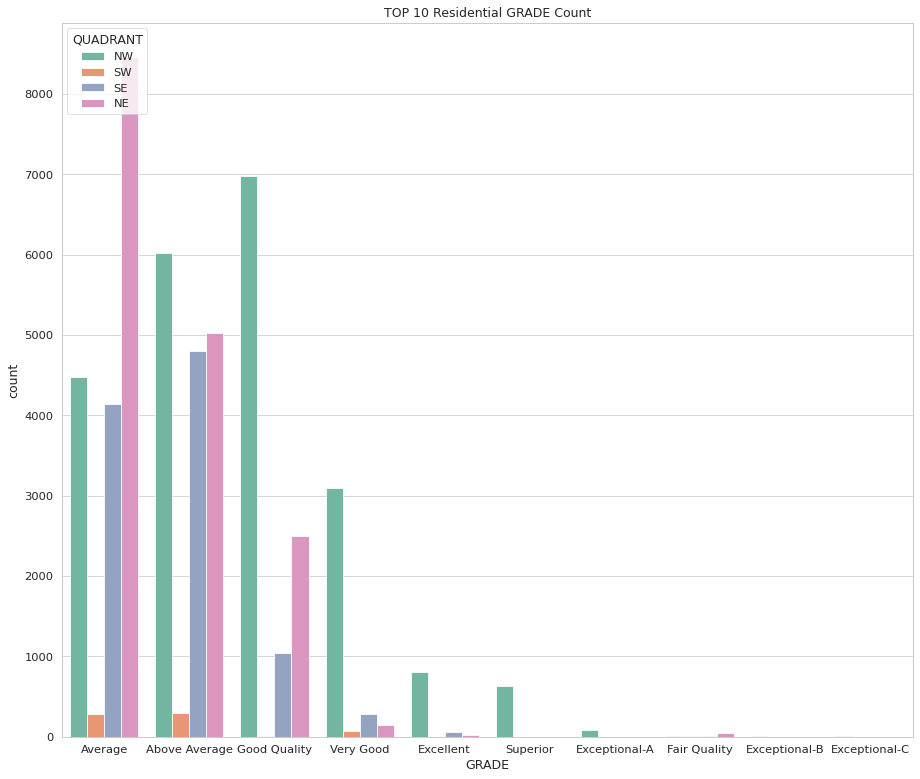

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='GRADE',data=df_res,order=df_res['GRADE'].value_counts().head(10).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 10 Residential GRADE Count')
plt.tight_layout()
plt.show()

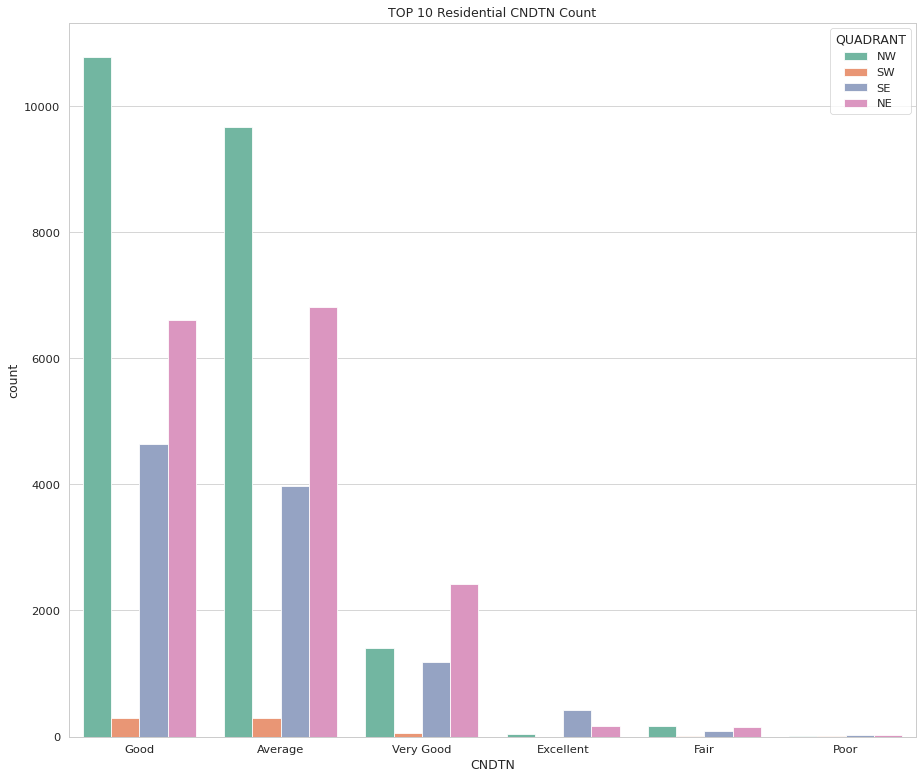

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='CNDTN',data=df_res,order=df_res['CNDTN'].value_counts().head(10).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 10 Residential Condition Count')
plt.tight_layout()
plt.show()

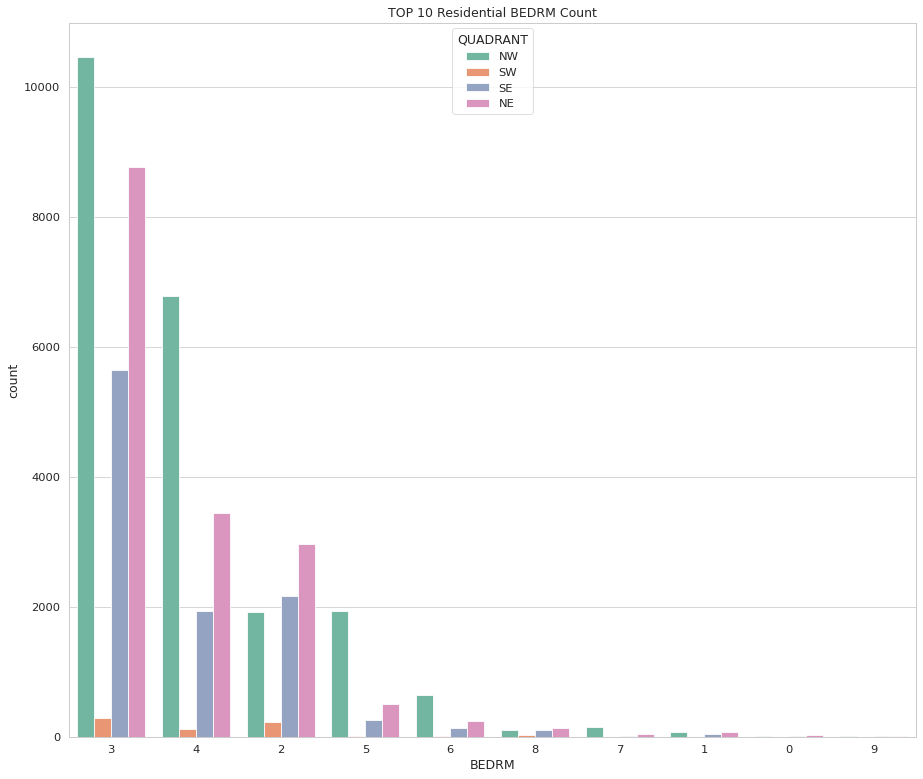

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='BEDRM',data=df_res,order=df_res['BEDRM'].value_counts().head(10).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 10 Residential BEDRM Count')
plt.tight_layout()
plt.show()

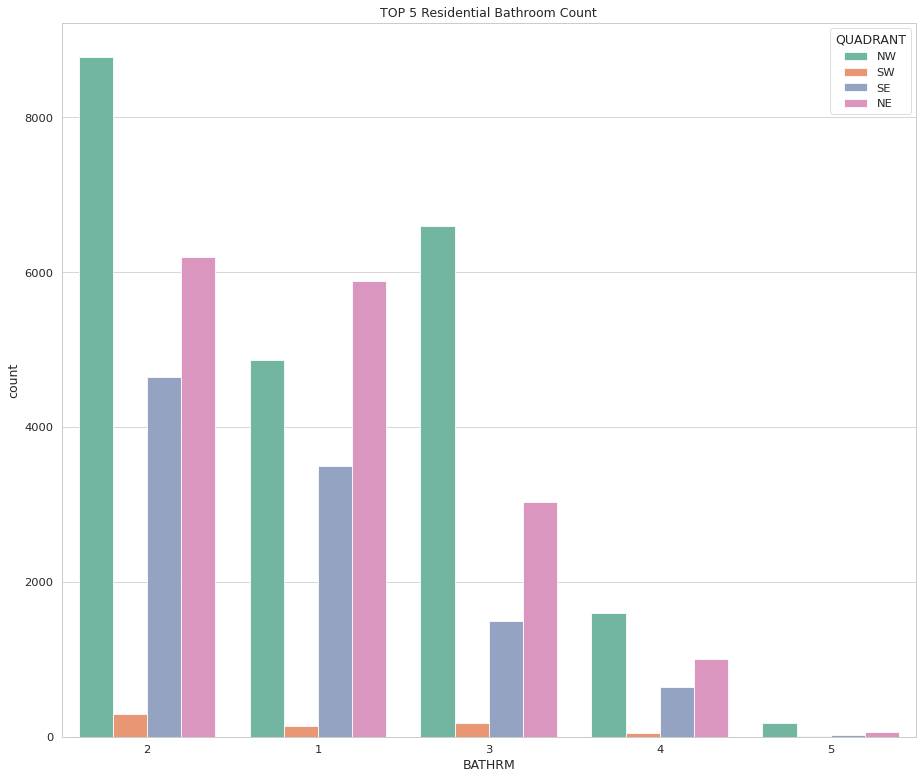

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='BATHRM',data=df_res,order=df_res['BATHRM'].value_counts().head(5).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 5 Residential Bathroom Count')
plt.tight_layout()
plt.show()

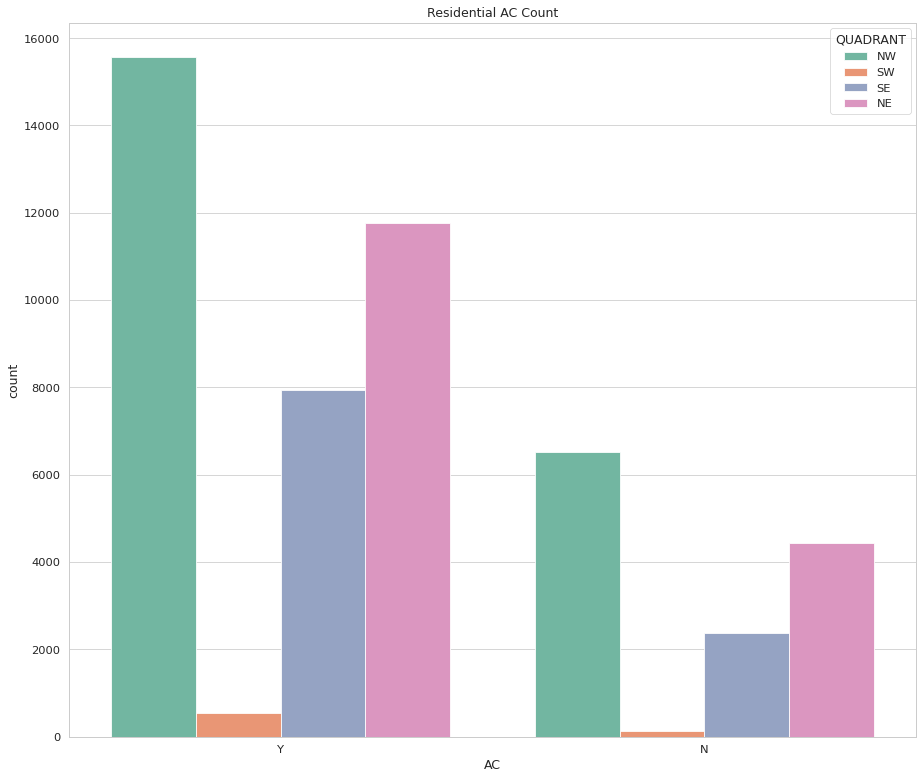

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='AC',data=df_res,order=df_res['AC'].value_counts().head(10).index,palette=color, hue = 'QUADRANT')
plt.title('Residential AC Count')
plt.tight_layout()
plt.show()

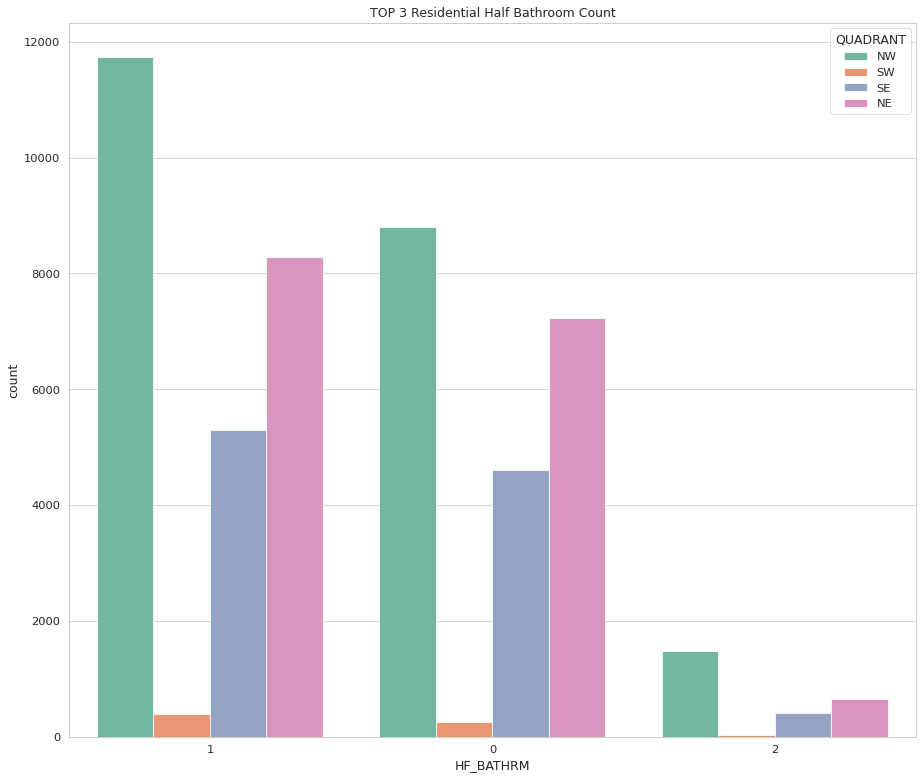

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='HF_BATHRM',data=df_res,order=df_res['HF_BATHRM'].value_counts().head(3).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 3 Residential Half Bathroom Count')
plt.tight_layout()
plt.show()

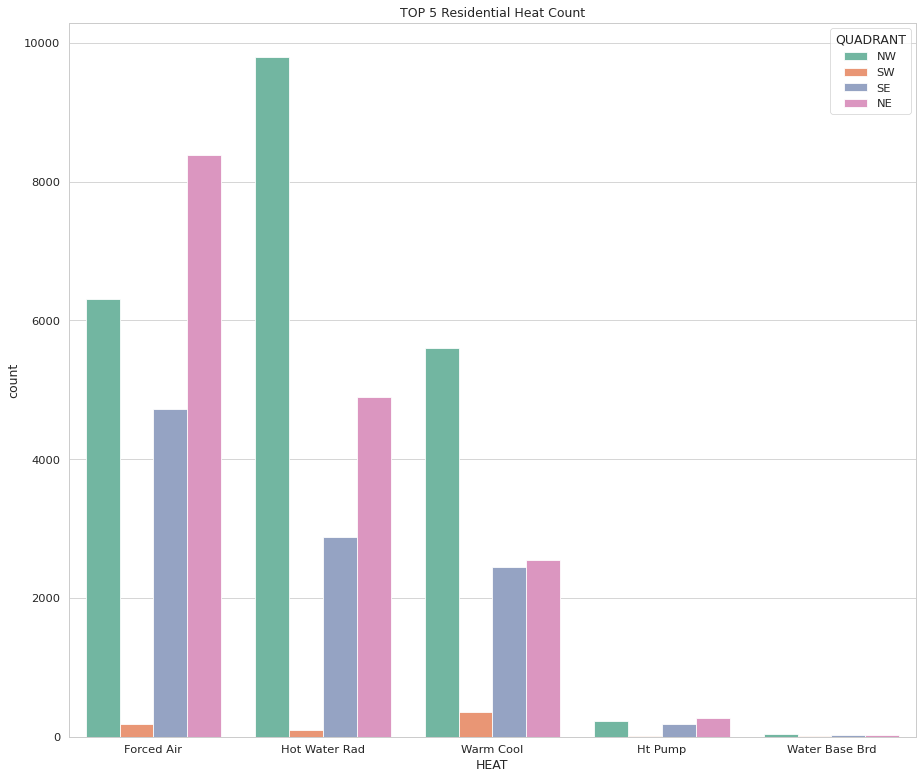

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='HEAT',data=df_res,order=df_res['HEAT'].value_counts().head(5).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 5 Residential Heat Count')
plt.tight_layout()
plt.show()

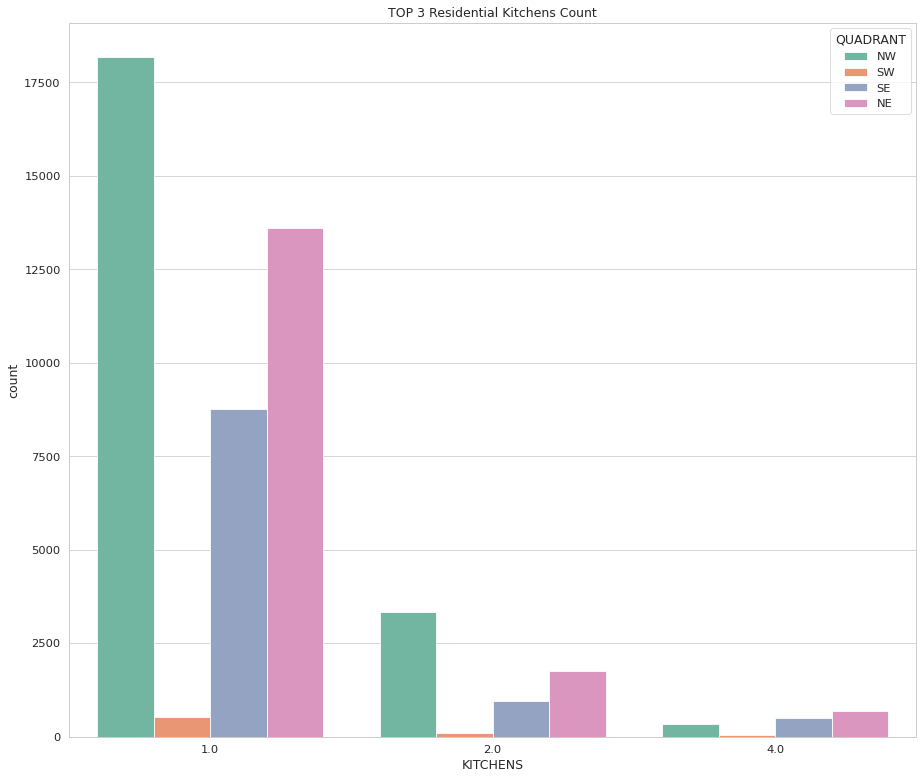

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='KITCHENS',data=df_res,order=df_res['KITCHENS'].value_counts().head(3).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 3 Residential Kitchens Count')
plt.tight_layout()
plt.show()

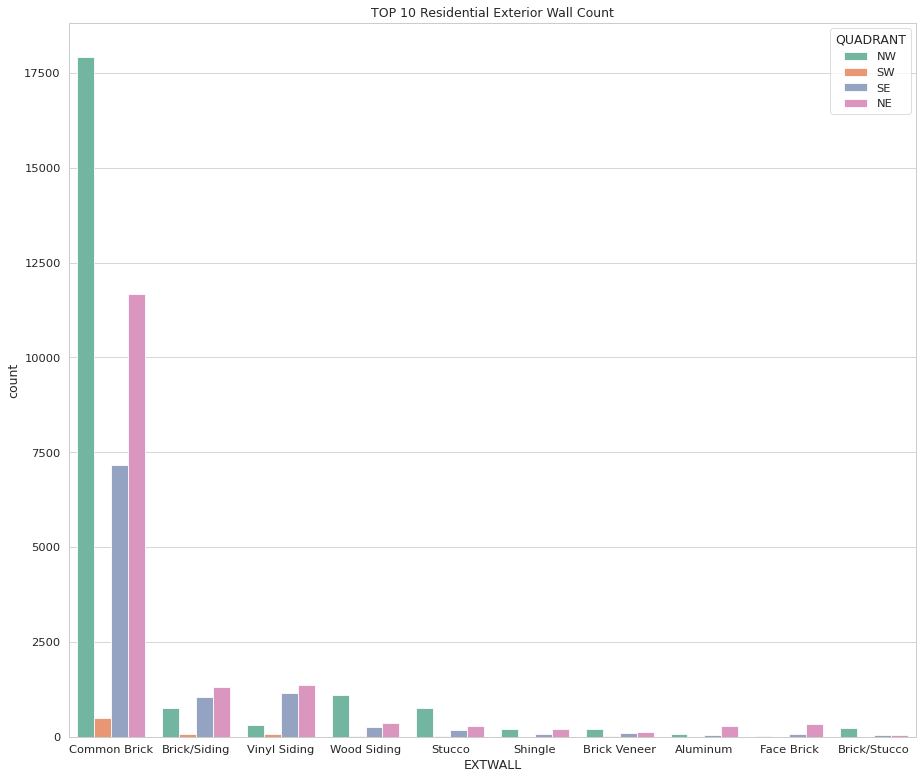

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='EXTWALL',data=df_res,order=df_res['EXTWALL'].value_counts().head(10).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 10 Residential Exterior Wall Count')
plt.tight_layout()
plt.show()

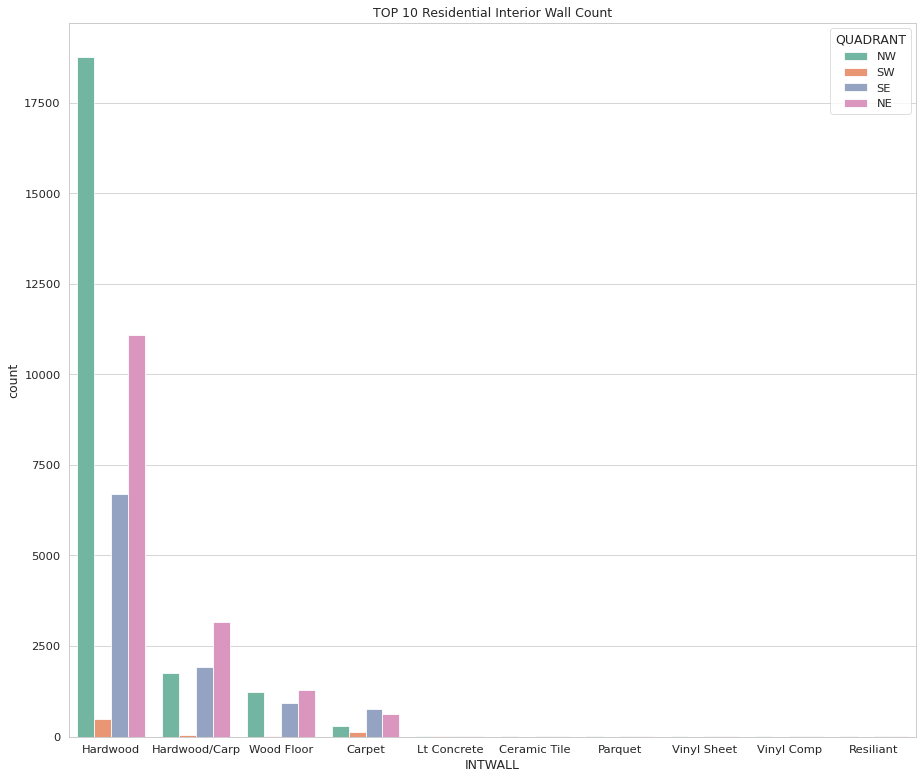

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='INTWALL',data=df_res,order=df_res['INTWALL'].value_counts().head(10).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 10 Residential Interior Wall Count')
plt.tight_layout()
plt.show()

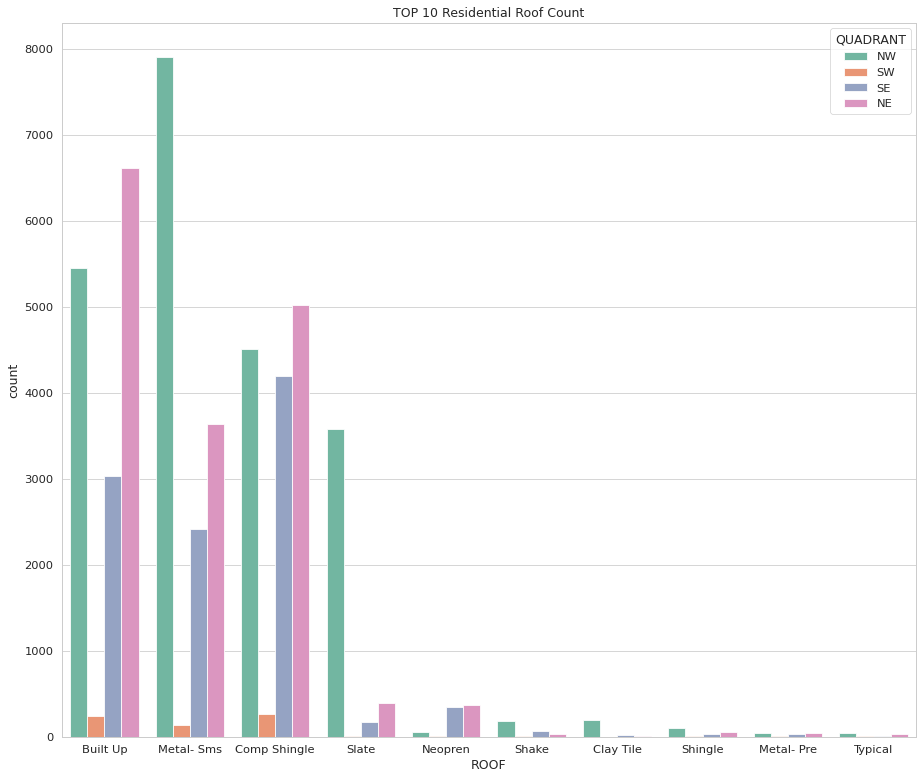

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='ROOF',data=df_res,order=df_res['ROOF'].value_counts().head(10).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 10 Residential Roof Count')
plt.tight_layout()
plt.show()

**Using Scatter plot to get better sense od GBA**

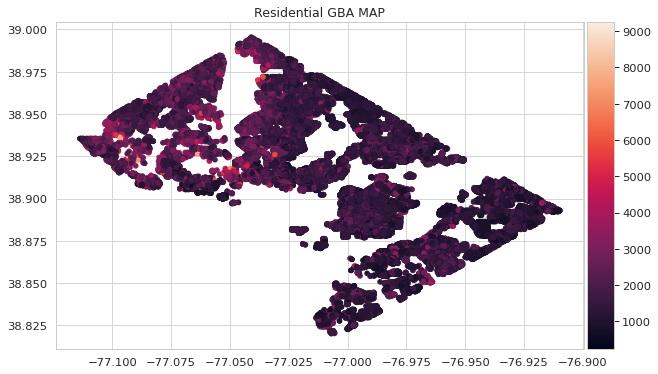

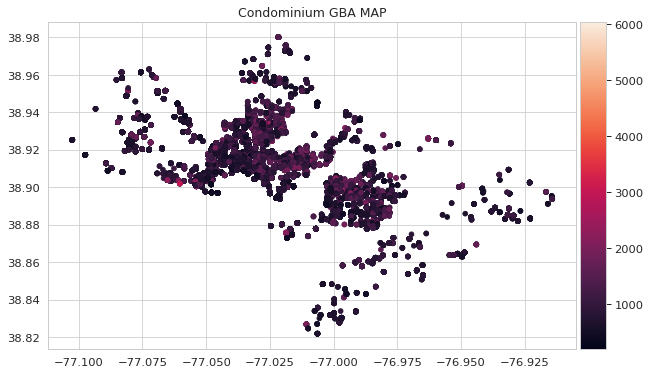

In [ ]:
# Fourth Map
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot()
im2 = ax2.scatter(df_res["LONGITUDE"], df_res['LATITUDE'], c=df_res['GBA'])
ax2.set_title('Residential GBA MAP')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

# Fifth Map
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot()
im2 = ax2.scatter(df_con["LONGITUDE"], df_con['LATITUDE'], c=df_con['LIVING_GBA'])
ax2.set_title('Condominium GBA MAP')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

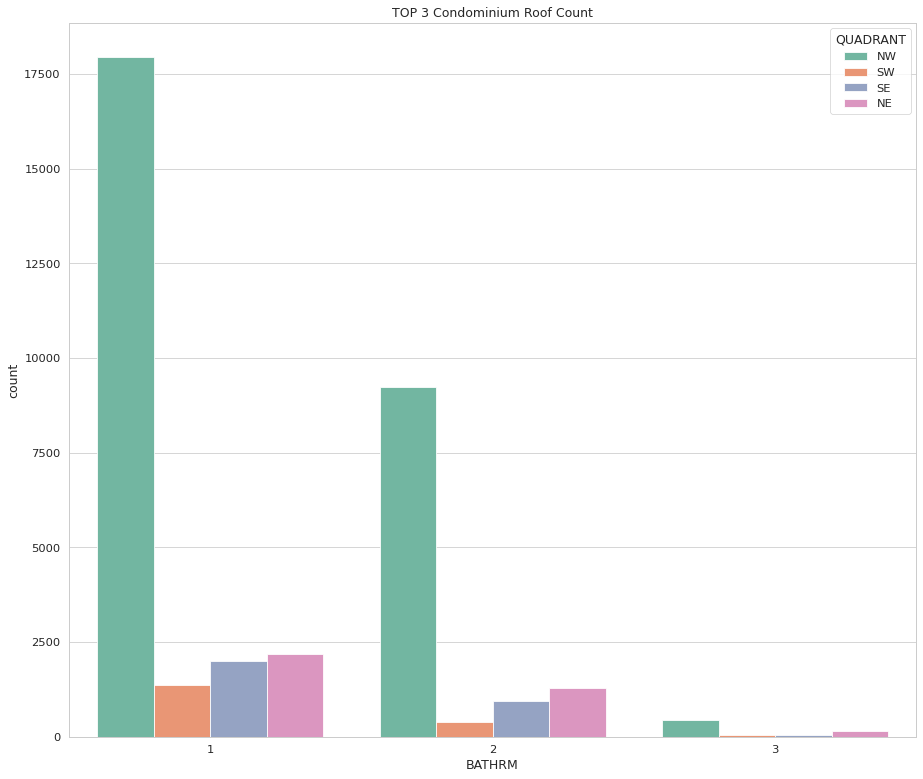

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='BATHRM',data=df_con,order=df_con['BATHRM'].value_counts().head(3).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 3 Condominium Roof Count')
plt.tight_layout()
plt.show()

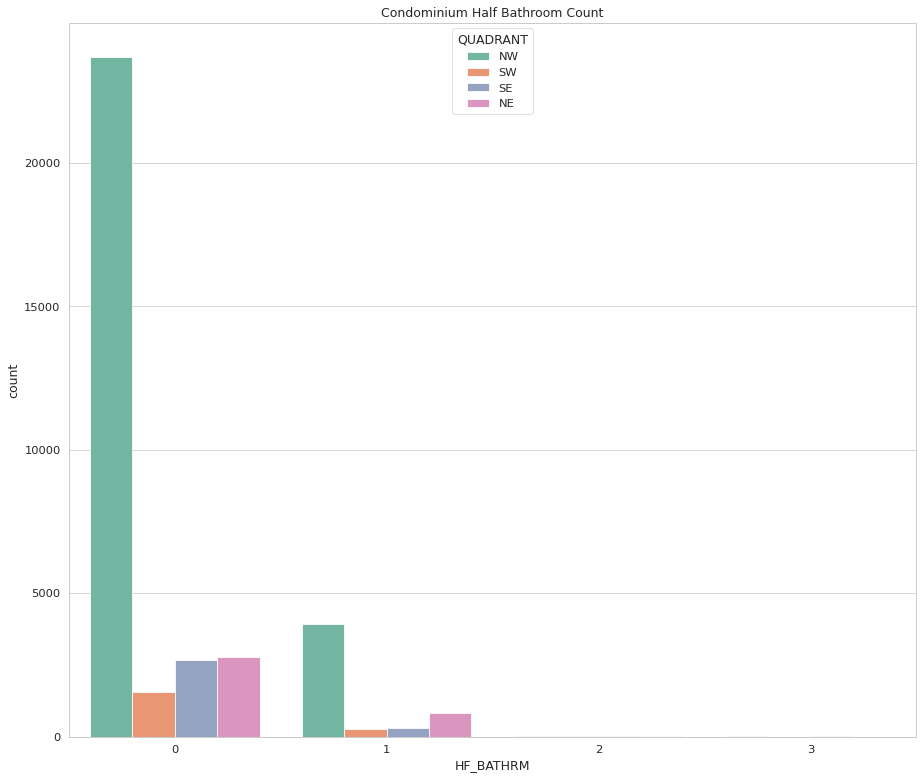

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='HF_BATHRM',data=df_con,order=df_con['HF_BATHRM'].value_counts().index,palette=color, hue = 'QUADRANT')
plt.title('Condominium Half Bathroom Count')
plt.tight_layout()
plt.show()

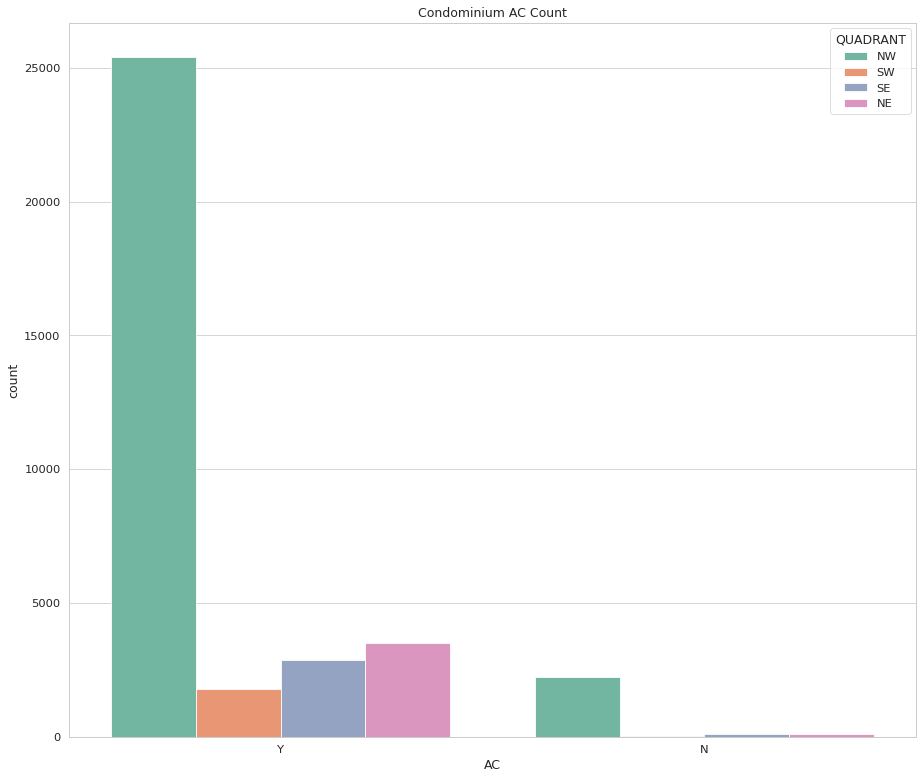

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(13,11))
sns.countplot(x='AC',data=df_con,order=df_con['AC'].value_counts().index,palette=color, hue = 'QUADRANT')
plt.title('Condominium AC Count')
plt.tight_layout()
plt.show()

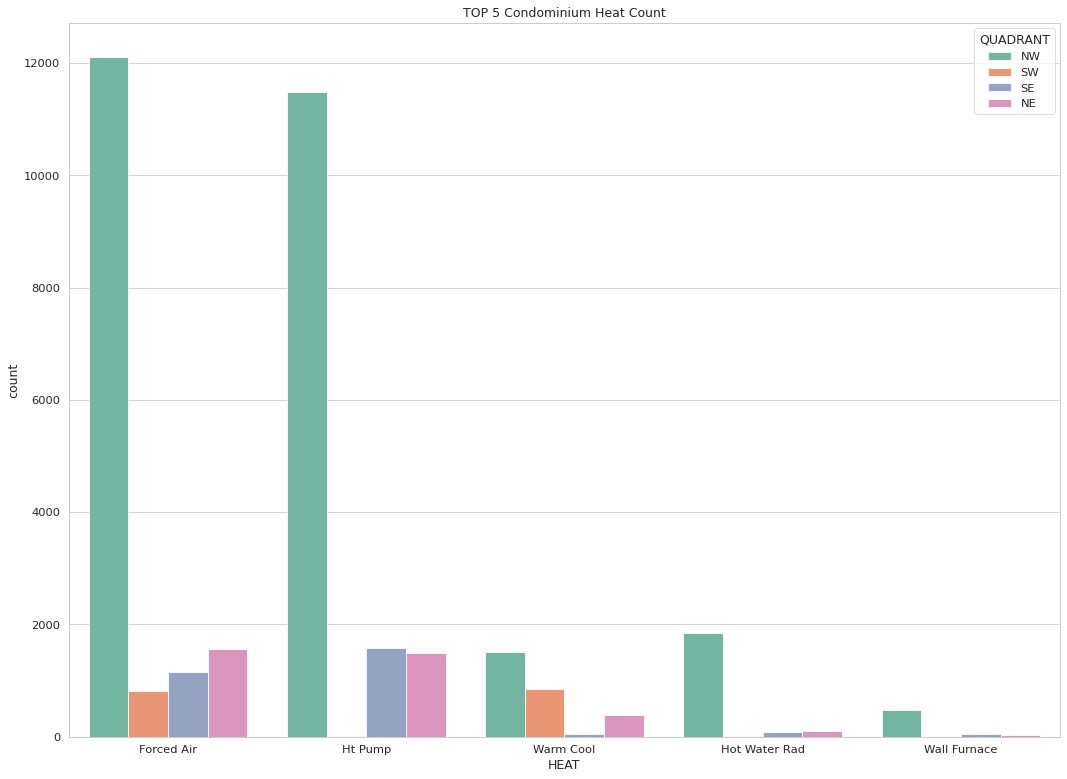

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(15,11))
sns.countplot(x='HEAT',data=df_con,order=df_con['HEAT'].value_counts().head(5).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 5 Condominium Heat Count')
plt.tight_layout()
plt.show()

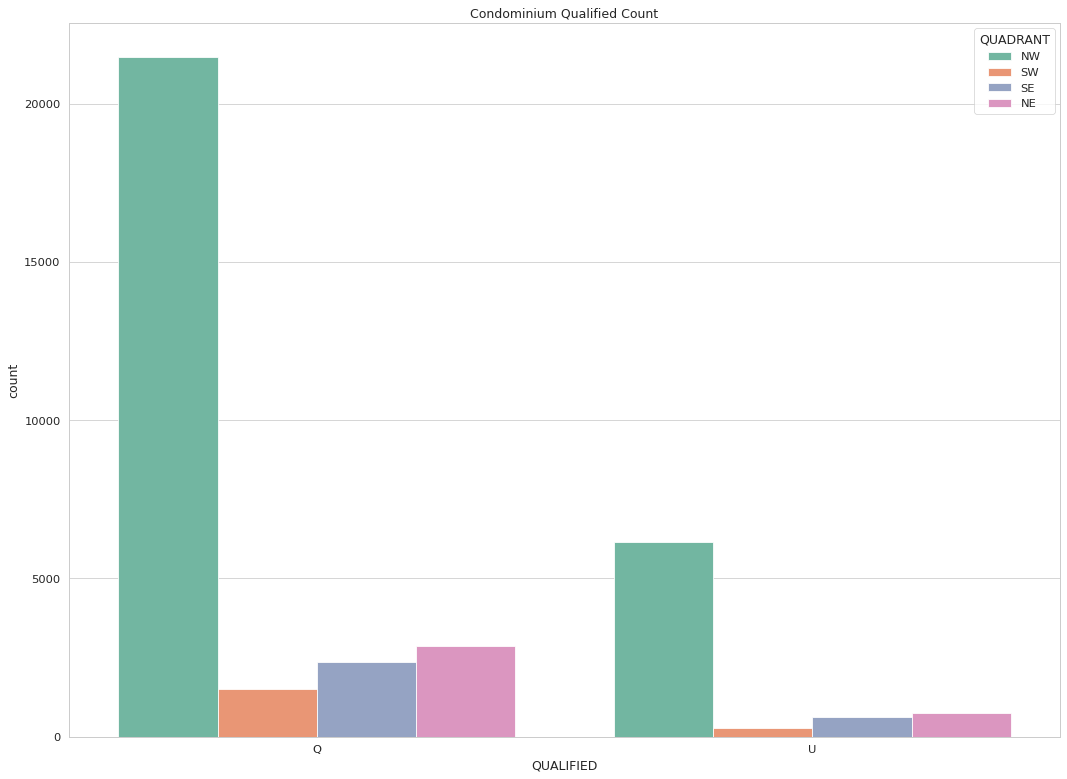

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(15,11))
sns.countplot(x='QUALIFIED',data=df_con,order=df_con['QUALIFIED'].value_counts().head(5).index,palette=color, hue = 'QUADRANT')
plt.title('Condominium Qualified Count')
plt.tight_layout()
plt.show()

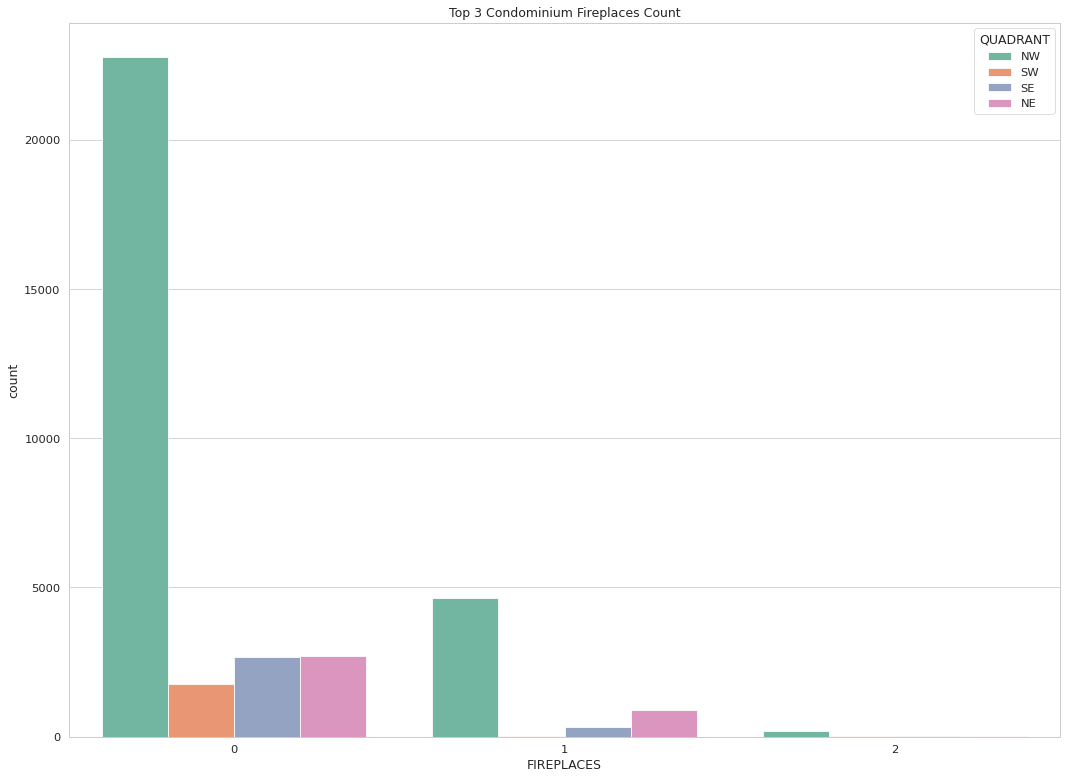

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(15,11))
sns.countplot(x='FIREPLACES',data=df_con,order=df_con['FIREPLACES'].value_counts().head(3).index,palette=color, hue = 'QUADRANT')
plt.title('Top 3 Condominium Fireplaces Count')
plt.tight_layout()
plt.show()

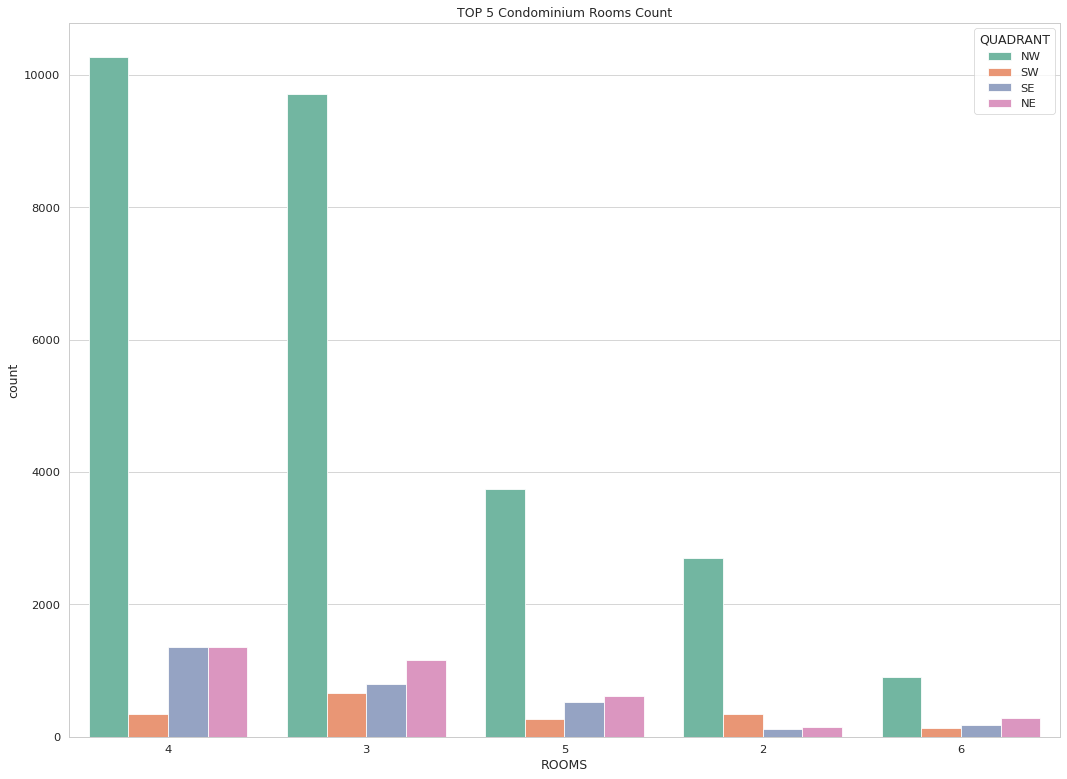

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(15,11))
sns.countplot(x='ROOMS',data=df_con,order=df_con['ROOMS'].value_counts().head(5).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 5 Condominium Rooms Count')
plt.tight_layout()
plt.show()

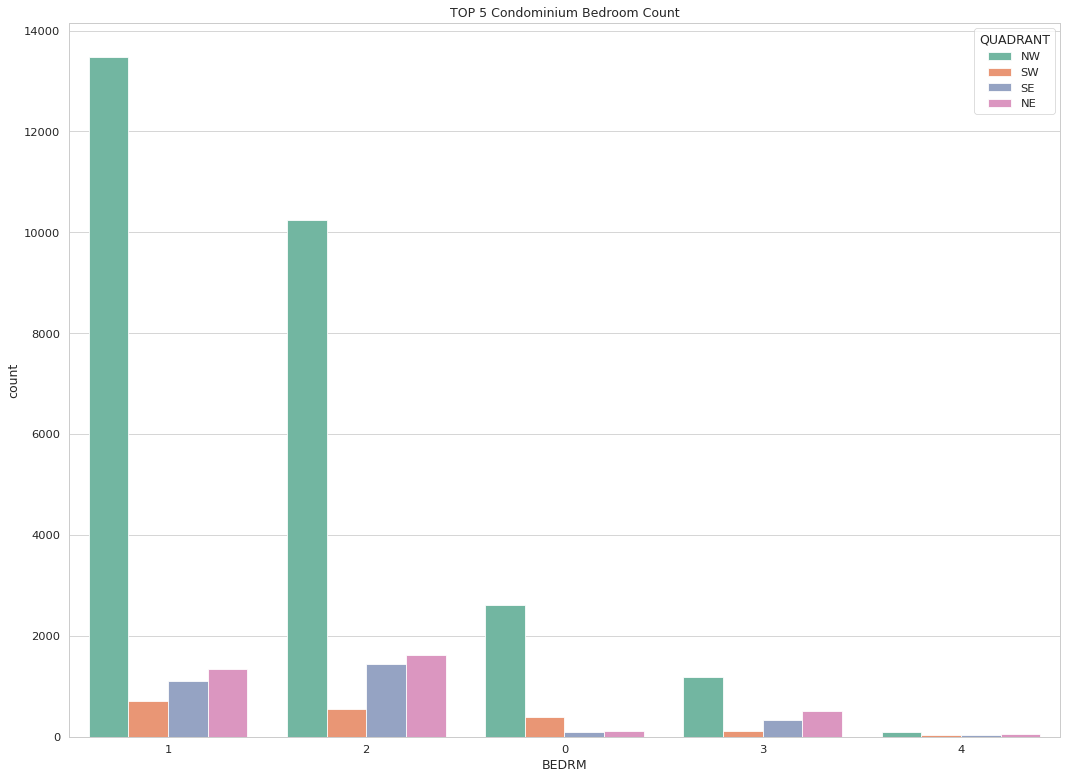

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(15,11))
sns.countplot(x='BEDRM',data=df_con,order=df_con['BEDRM'].value_counts().head(5).index,palette=color, hue = 'QUADRANT')
plt.title('TOP 5 Condominium Bedroom Count')
plt.tight_layout()
plt.show()

In [ ]:
def price_cat(price):
  if price <=353510:
    return "Tier 1"
  elif price <=553510:
    return "Tier 2"
  elif price <=753510:
    return "Tier 3"
  elif price <=953510:
    return "Tier 4"
  elif price <=1153510:
    return "Tier 5"

df_res['PRICE_CAT'] = df_res.apply(lambda x : price_cat(x['PRICE']),axis=1)
df_con['PRICE_CAT'] = df_con.apply(lambda x : price_cat(x['PRICE']),axis=1)
df_use['PRICE_CAT'] = df_use.apply(lambda x : price_cat(x['PRICE']),axis=1)

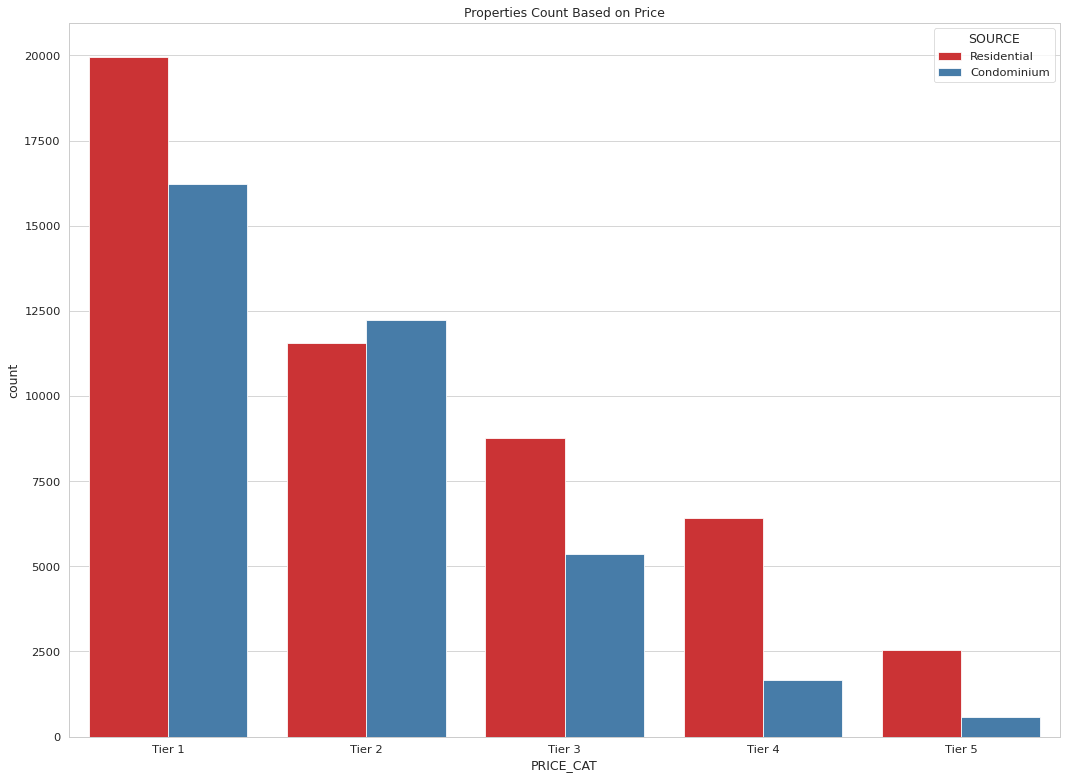

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set1", 30)
plt.figure(figsize=(15,11))
sns.countplot(x='PRICE_CAT',data=df_use,order=df_res['PRICE_CAT'].value_counts().head(5).index,palette=color, hue = 'SOURCE')
plt.title('Properties Count Based on Price')
plt.tight_layout()
plt.show()

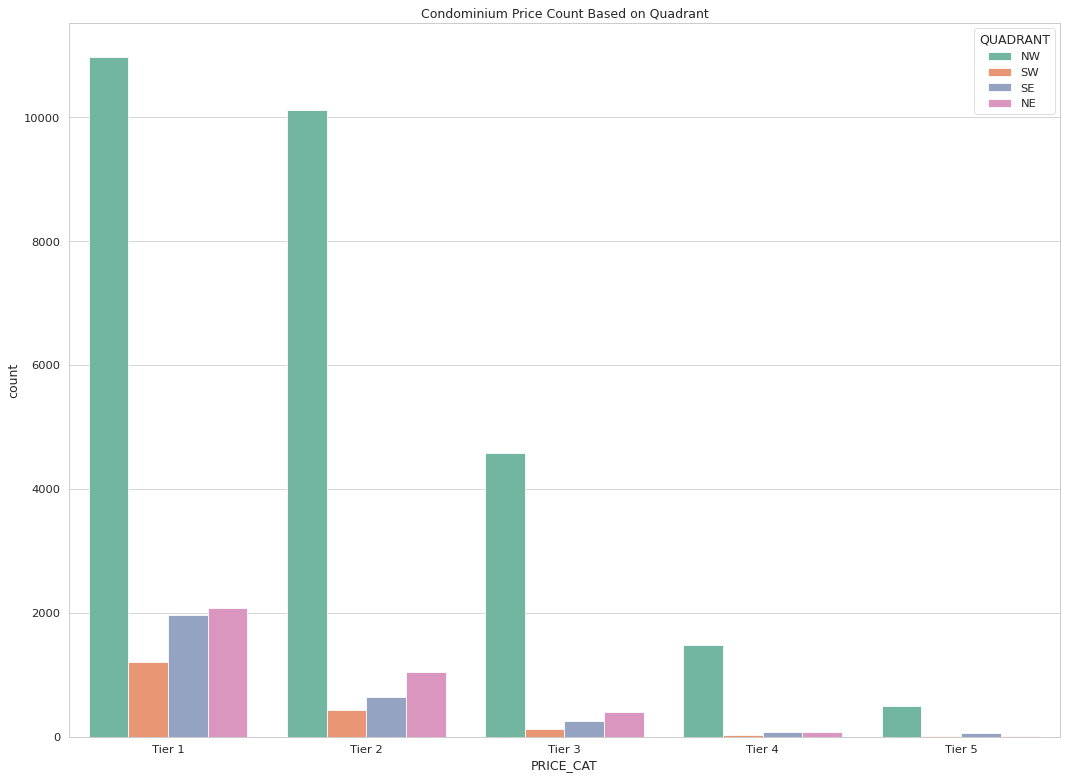

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(15,11))
sns.countplot(x='PRICE_CAT',data=df_con,order=df_con['PRICE_CAT'].value_counts().head(5).index,palette=color, hue = 'QUADRANT')
plt.title('Condominium Price Count Based on Quadrant')
plt.tight_layout()
plt.show()

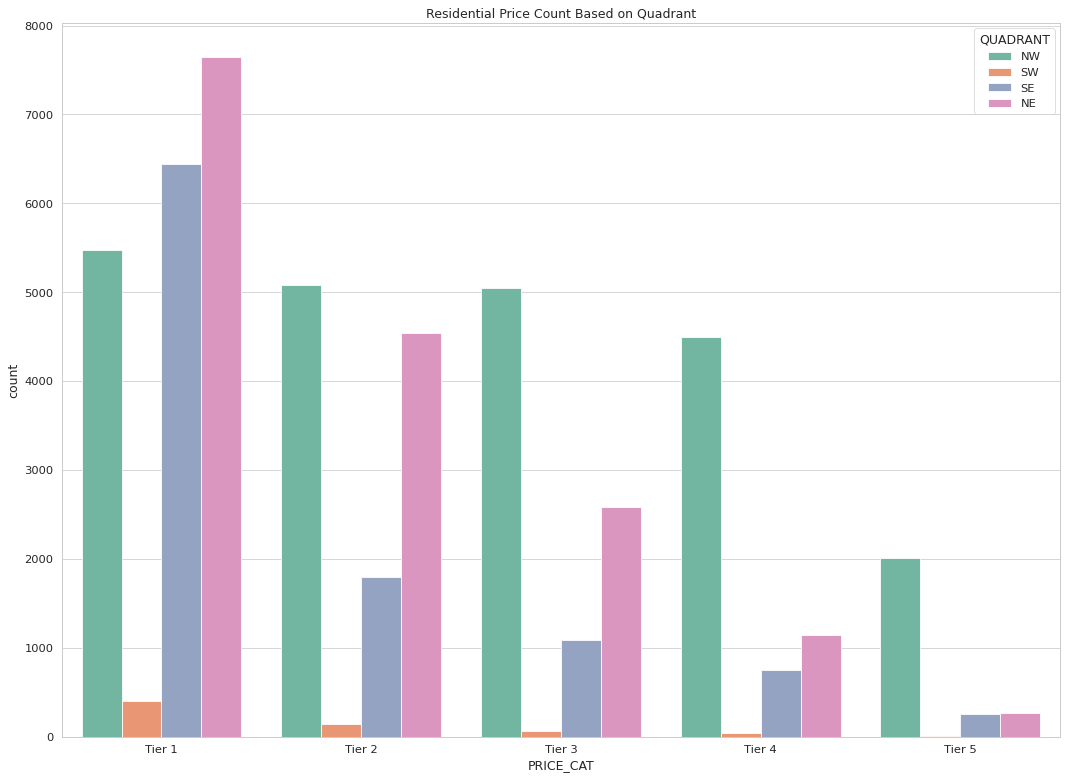

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
color = sns.color_palette("Set2", 6)
plt.figure(figsize=(15,11))
sns.countplot(x='PRICE_CAT',data=df_res,order=df_res['PRICE_CAT'].value_counts().head(5).index,palette=color, hue = 'QUADRANT')
plt.title('Residential Price Count Based on Quadrant')
plt.tight_layout()
plt.show()

## Modelling

Due to difference of characteristics from our 2 sources, it is wise to build 2 different model for each category rather than building a model intended for different characteristic of data.

> #### Clustering : KMeans

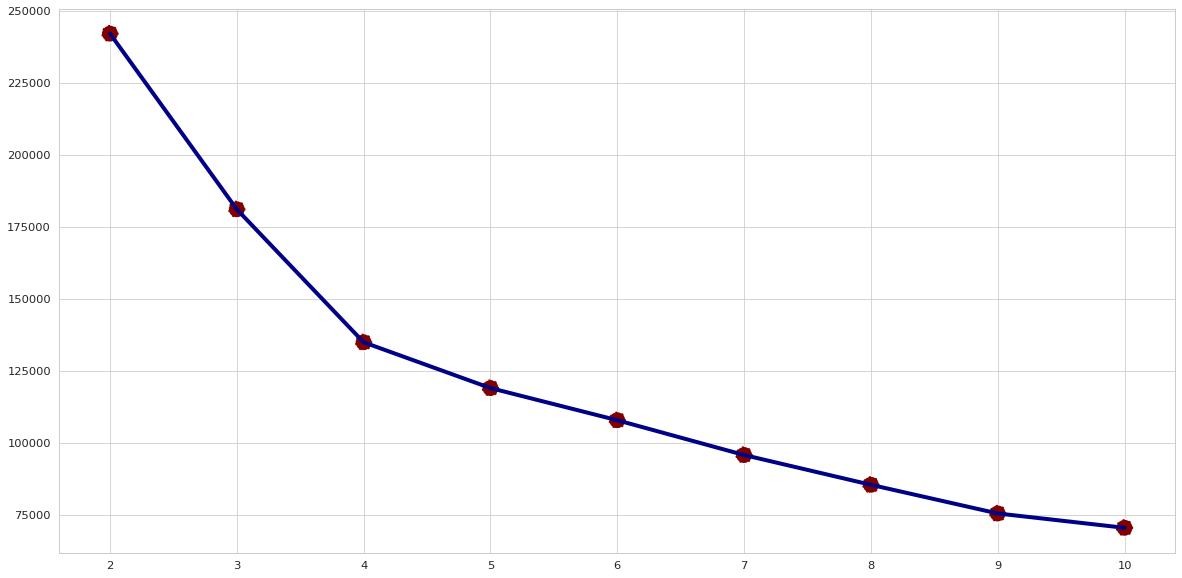

In [ ]:
df_clus_2= df_combined[['P0010001','P0030001','H0010001','FAGI_MEDIAN_2015','SQ_MILES','LONGITUDE','LATITUDE']].dropna()
df_clus_2['Adult_Density']=df_clus_2['P0030001'] /df_clus_2['P0010001']
df_clus_2['Housing_Density']=df_clus_2['P0010001'] /df_clus_2['SQ_MILES']
df_clus_3 = df_clus_2[['P0010001','Adult_Density','Housing_Density','FAGI_MEDIAN_2015']]


Clus2 = StandardScaler().fit_transform(df_clus_3)


from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(Clus2)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

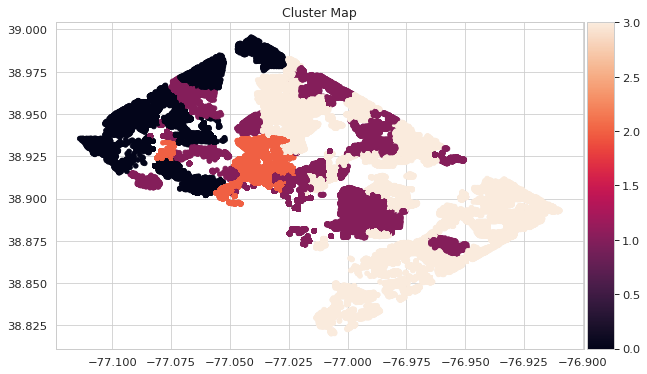

In [ ]:
#df_complete['Cluster']= df_clus_2['clusters']

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot()
im1 = ax1.scatter(df_clus_2["LONGITUDE"], df_clus_2['LATITUDE'], c=df_clus_2['clusters'])
ax1.set_title('Cluster Map')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(Clus2)
labels = kmeans.labels_
labels.shape
df_clus_2['clusters']=labels

In [ ]:
df_clus_2['clusters'].shape

(85340,)

In [ ]:
df_combined.shape

(85340, 115)

In [ ]:
df_combined = pd.concat([df_combined,df_clus_2[['clusters']]],axis=1)

In [ ]:
#gunakan code ini ketika terdapat kolom clusters lebih dari satu
#df_combined = df_combined.iloc[: , :-1]

In [ ]:
df_combined.shape

(85340, 113)

> ## PCA

> ## Modelling 2

As we know , our  data consist of numerous amount of variables. And as we explore , the relationship between our variables has a relatively weak linear correlation. Dare to say that our data has a non linear relationship.
<br>
<br>

Looking at these conditions , PCA technique would be suitable for building a robust model

<br> 
<br>

After PCA is done , regression can be conducted

> #### Residential



##### Principal Component Analysis

In [ ]:
df_residen = df_combined[df_combined['SOURCE']=='Residential']
df_residen['STORIES'] = df_residen['STORIES'].fillna(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_residen = df_residen[df_residen['KITCHENS'].isnull()== False]

In [ ]:
df_residen.dropna(subset=['QUADRANT'],inplace=True)
df_residen = df_residen.reset_index().drop('index',axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_residen.shape

(49238, 113)

In [ ]:
df_residen.isnull().sum().max()

49238

In [ ]:
df_residen.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB',
       ...
       'FAGI_MEDIAN_2013', 'FAGI_TOTAL_2011', 'FAGI_MEDIAN_2011',
       'FAGI_TOTAL_2012', 'FAGI_MEDIAN_2012', 'FAGI_TOTAL_2014',
       'FAGI_MEDIAN_2014', 'FAGI_TOTAL_2015', 'FAGI_MEDIAN_2015', 'clusters'],
      dtype='object', length=113)

In [ ]:
df_res.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'WARD', 'STYLE', 'QUALIFIED',
       'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS',
       'FIREPLACES', 'LANDAREA', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'STORIES',
       'GBA', 'QUADRANT', 'H0010001', 'P0010001', 'FAGI_MEDIAN_2015', 'PRICE',
       'ASSESSMENT_NBHD', 'SOURCE', 'YR_RMDL_CAT', 'LATITUDE', 'LONGITUDE',
       'PRICE_CAT'],
      dtype='object')

In [ ]:
df_residen.shape

(49238, 113)

In [ ]:
df_residen.drop(['P0010002', 'P0010003', 'P0010004', 'P0010005', 'P0010006','P0010007','P0010008', 'OP000001', 'OP000002', 'OP000003', 'OP000004', 'P0020002', 'P0020005', 'P0020006', 'P0020006', 'P0020007', 'P0020008', 'P0020009', 'P0020010', 'OP00005', 'OP00006', 'OP00007', 'OP00008', 'P0030001', 'P0030003', 'P0030004', 'P0030005', 'P0030006', 'P0030007', 'P0030008','OP00009', 'OP00010', 'OP00011', 'OP00012','P0040002', 'P0040005', 'P0040006', 'P0040007', 'P0040008', 'P0040009', 'P0040010', 'OP000013', 'OP000014','OP000015', 'OP000016', 'H0010002', 'H0010003', 'FAGI_MEDIAN_2010', 'FAGI_TOTAL_2010', 'FAGI_MEDIAN_2013', 'FAGI_TOTAL_2013', 'FAGI_MEDIAN_2011', 'FAGI_TOTAL_2011', 'FAGI_MEDIAN_2012', 'FAGI_TOTAL_2012', 'FAGI_MEDIAN_2014', 'FAGI_TOTAL_2014','ACRES','Shape_Length', 'SQ_MILES'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(df_residen.shape)

(49238, 54)


In [ ]:
df_residen.drop(['CMPLX_NUM','LIVING_GBA'],axis='columns',inplace=True)

In [ ]:
df_residen.shape

(49238, 52)

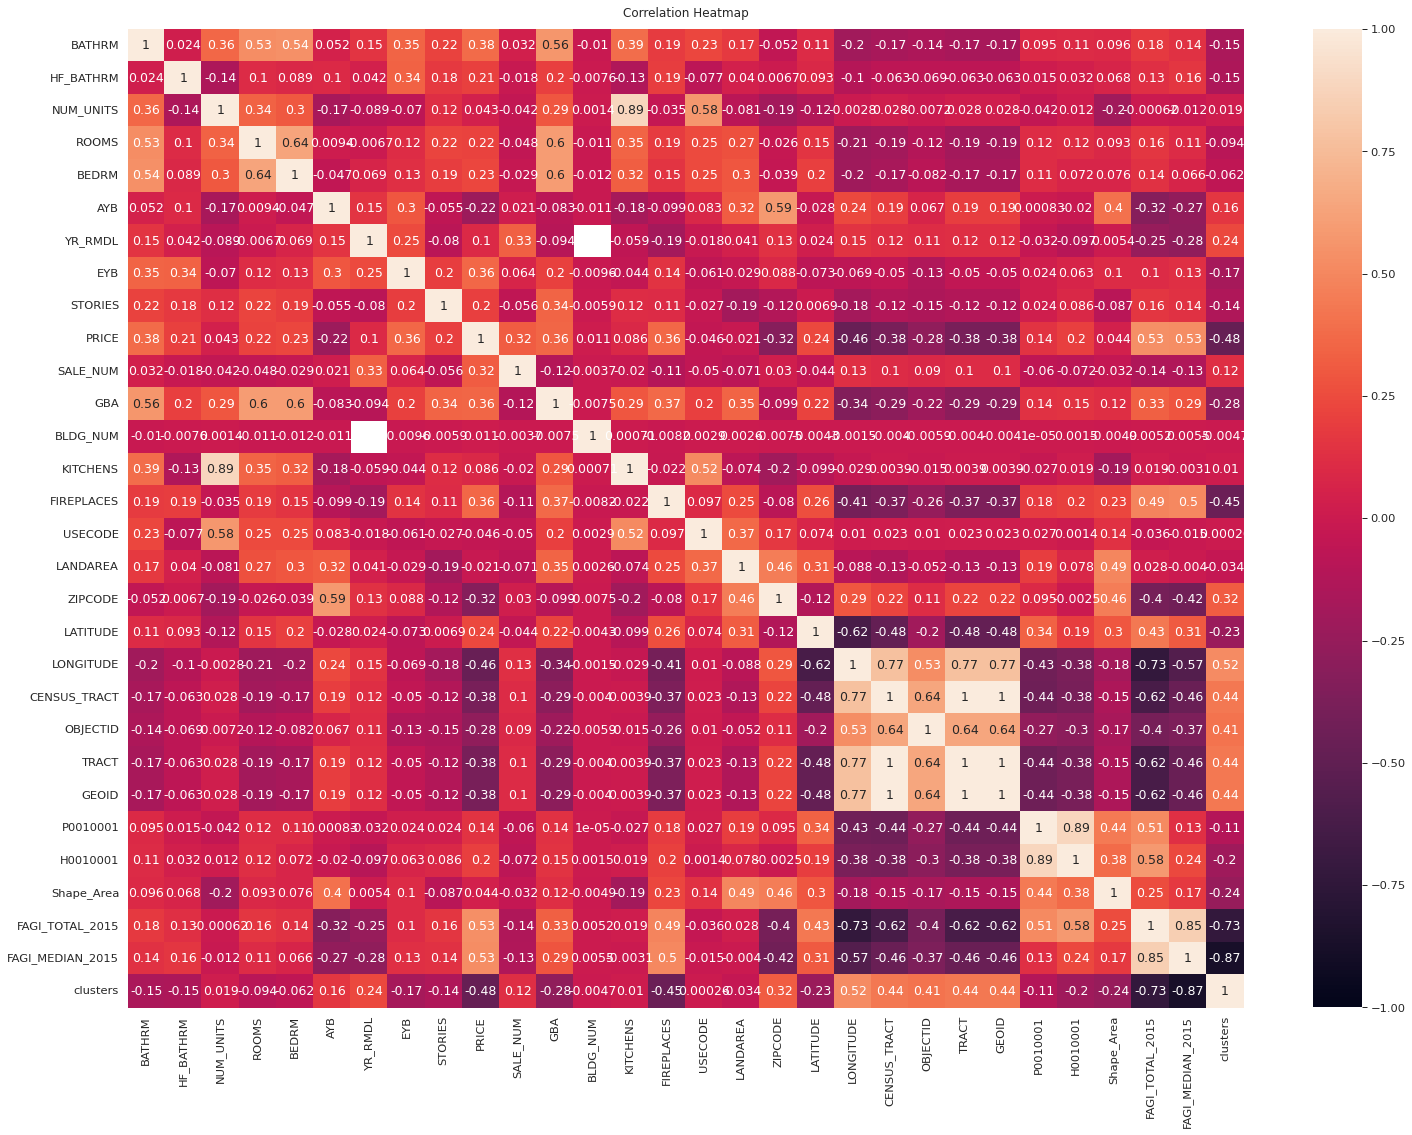

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(25, 18))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_residen.corr('spearman'), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Lakukan PCA terhadap fitur-fitur yang saling memiliki korelasi yang tinggi**

In [ ]:
df_res_pca1 = df_residen[['BATHRM','ROOMS','BEDRM','GBA','PRICE']]
df_res_pca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49238 entries, 0 to 49237
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BATHRM  49238 non-null  int64  
 1   ROOMS   49238 non-null  int64  
 2   BEDRM   49238 non-null  int64  
 3   GBA     49238 non-null  float64
 4   PRICE   49238 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.9 MB


In [ ]:
from math import log10
df_res_pca1['PRICE_LOG'] = df_res_pca1.apply(lambda x : log10(x['PRICE']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_res_pca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49238 entries, 0 to 49237
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BATHRM     49238 non-null  int64  
 1   ROOMS      49238 non-null  int64  
 2   BEDRM      49238 non-null  int64  
 3   GBA        49238 non-null  float64
 4   PRICE      49238 non-null  float64
 5   PRICE_LOG  49238 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 2.3 MB


In [ ]:
feats = ['BATHRM','ROOMS','BEDRM','GBA']

In [ ]:
X = df_res_pca1.loc[:, feats].values
y = df_res_pca1.loc[:,'PRICE_LOG'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
new_df = pd.DataFrame(data = X_std, columns = feats).head()
new_df

,BATHRM,ROOMS,BEDRM,GBA
0,2.048897,0.349748,0.662222,1.489074
1,0.974043,0.349748,0.662222,1.292155
2,0.974043,0.820276,-0.320167,-0.014673
3,-1.175663,-0.591310,-0.320167,0.297794
4,-0.100810,-1.061838,-0.320167,-0.011418


In [ ]:
from sklearn.decomposition import PCA

pca_res1 = PCA(n_components=2)
pcs_res1 = pca_res1.fit_transform(X_std)

pdf_res1 = pd.DataFrame(data = pcs_res1, columns = ['pc1', 'pc2'])
pdf_res1.head(5)

,pc1,pc2
0,2.254708,-1.271754
1,1.634435,-0.406356
2,0.725006,-0.679609
3,-0.880079,0.560517
4,-0.757105,-0.418500


In [ ]:
df_res_pca1[['PRICE_LOG']].head()

,PRICE_LOG
0,6.039414
1,6.021189
2,5.772505
3,5.957799
4,6.027350


In [ ]:
finalDf = pd.concat([pdf_res1, df_res_pca1[['PRICE_LOG']]], axis = 1)
finalDf.head(5)

,pc1,pc2,PRICE_LOG
0,2.254708,-1.271754,6.039414
1,1.634435,-0.406356,6.021189
2,0.725006,-0.679609,5.772505
3,-0.880079,0.560517,5.957799
4,-0.757105,-0.418500,6.027350


In [ ]:
print('Explained variance:', pca_res1.explained_variance_)
print('Explained variance ratio:', pca_res1.explained_variance_ratio_)

Explained variance: [2.83295781 0.45083136]
Explained variance ratio: [0.70822507 0.11270555]


In [ ]:
df_res_pca2 = df_residen[['KITCHENS','NUM_UNITS','USECODE','PRICE']]
df_res_pca2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49238 entries, 0 to 49237
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   KITCHENS   49238 non-null  float64
 1   NUM_UNITS  49238 non-null  float64
 2   USECODE    49238 non-null  int64  
 3   PRICE      49238 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.5 MB


In [ ]:
df_res_pca2.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_res_pca2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49238 entries, 0 to 49237
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   KITCHENS   49238 non-null  float64
 1   NUM_UNITS  49238 non-null  float64
 2   USECODE    49238 non-null  int64  
 3   PRICE      49238 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.9 MB


In [ ]:
df_res_pca2['PRICE_LOG'] = df_res_pca2.apply(lambda x : log10(x['PRICE']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_res_pca2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49238 entries, 0 to 49237
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   KITCHENS   49238 non-null  float64
 1   NUM_UNITS  49238 non-null  float64
 2   USECODE    49238 non-null  int64  
 3   PRICE      49238 non-null  float64
 4   PRICE_LOG  49238 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.3 MB


In [ ]:
feats = ['KITCHENS','NUM_UNITS','USECODE']

In [ ]:
X = df_res_pca2.loc[:, feats].values
y = df_res_pca2.loc[:,'PRICE_LOG'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

,KITCHENS,NUM_UNITS,USECODE
0,1.156825,1.274243,2.623736
1,1.156825,1.274243,2.623736
2,1.156825,1.274243,2.623736
3,-0.364739,-0.347814,-0.048539
4,-0.364739,-0.347814,-0.048539


In [ ]:
from sklearn.decomposition import PCA

pca_res2 = PCA(n_components=2)
pcs_res2 = pca_res2.fit_transform(X_std)

pdf_res2 = pd.DataFrame(data = pcs_res2, columns = ['pc1', 'pc2'])

pdf_res2.head()

,pc1,pc2
0,2.885335,-1.218516
1,2.885335,-1.218516
2,2.885335,-1.218516
3,-0.446215,-0.237312
4,-0.446215,-0.237312


In [ ]:
pdf_res2.isna().sum()

pc1    0
pc2    0
dtype: int64

In [ ]:
df_res_pca2[['PRICE_LOG']].head()

,PRICE_LOG
0,6.039414
1,6.021189
2,5.772505
3,5.957799
4,6.027350


In [ ]:
finalDf = pd.concat([pdf_res2, df_res_pca2[['PRICE_LOG']]], axis = 1)
finalDf.head(5)

,pc1,pc2,PRICE_LOG
0,2.885335,-1.218516,6.039414
1,2.885335,-1.218516,6.021189
2,2.885335,-1.218516,5.772505
3,-0.446215,-0.237312,5.957799
4,-0.446215,-0.237312,6.027350


In [ ]:
print('Explained variance:', pca_res2.explained_variance_)
print('Explained variance ratio:', pca_res2.explained_variance_ratio_)

Explained variance: [2.63637081 0.28402862]
Explained variance ratio: [0.87877242 0.09467428]


In [ ]:
df_residen.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'FULLADDRESS', 'ZIPCODE',
       'NATIONALGRID', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE',
       'QUADRANT', 'YR_RMDL_CAT', 'OBJECTID', 'TRACT', 'GEOID', 'P0010001',
       'H0010001', 'Shape_Area', 'FAGI_TOTAL_2015', 'FAGI_MEDIAN_2015',
       'clusters'],
      dtype='object')

In [ ]:
df_res_pca3 = df_residen[['STYLE','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','AC','HEAT','WARD','PRICE']]
df_res_pca3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49238 entries, 0 to 49237
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STYLE    49238 non-null  object 
 1   STRUCT   49238 non-null  object 
 2   GRADE    49238 non-null  object 
 3   CNDTN    49238 non-null  object 
 4   EXTWALL  49238 non-null  object 
 5   ROOF     49238 non-null  object 
 6   INTWALL  49238 non-null  object 
 7   AC       49238 non-null  object 
 8   HEAT     49238 non-null  object 
 9   WARD     49238 non-null  object 
 10  PRICE    49238 non-null  float64
dtypes: float64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
df_res_pca3_dum = pd.get_dummies(df_res_pca3)
df_res_pca3_dum

,PRICE,STYLE_1 Story,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,STYLE_2.5 Story Unfin,STYLE_3 Story,STYLE_3.5 Story Fin,STYLE_3.5 Story Unfin,STYLE_4 Story,STYLE_4.5 Story Unfin,STYLE_Bi-Level,STYLE_Split Foyer,STYLE_Split Level,STYLE_Vacant,STRUCT_Multi,STRUCT_Row End,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single,STRUCT_Town End,STRUCT_Town Inside,GRADE_Above Average,GRADE_Average,GRADE_Excellent,GRADE_Exceptional-A,GRADE_Exceptional-B,GRADE_Exceptional-C,GRADE_Fair Quality,GRADE_Good Quality,GRADE_Low Quality,GRADE_Superior,GRADE_Very Good,CNDTN_Average,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good,EXTWALL_Adobe,EXTWALL_Aluminum,EXTWALL_Brick Veneer,EXTWALL_Brick/Siding,EXTWALL_Brick/Stone,EXTWALL_Brick/Stucco,EXTWALL_Common Brick,EXTWALL_Concrete,EXTWALL_Concrete Block,EXTWALL_Face Brick,EXTWALL_Hardboard,EXTWALL_Metal Siding,EXTWALL_Plywood,EXTWALL_Shingle,EXTWALL_Stone,EXTWALL_Stone Veneer,EXTWALL_Stone/Siding,EXTWALL_Stone/Stucco,EXTWALL_Stucco,EXTWALL_Stucco Block,EXTWALL_Vinyl Siding,EXTWALL_Wood Siding,ROOF_Built Up,ROOF_Clay Tile,ROOF_Comp Shingle,ROOF_Composition Ro,ROOF_Concrete,ROOF_Concrete Tile,ROOF_Metal- Cpr,ROOF_Metal- Pre,ROOF_Metal- Sms,ROOF_Neopren,ROOF_Shake,ROOF_Shingle,ROOF_Slate,ROOF_Typical,ROOF_Water Proof,ROOF_Wood- FS,INTWALL_Carpet,INTWALL_Ceramic Tile,INTWALL_Hardwood,INTWALL_Hardwood/Carp,INTWALL_Lt Concrete,INTWALL_Parquet,INTWALL_Resiliant,INTWALL_Terrazo,INTWALL_Vinyl Comp,INTWALL_Vinyl Sheet,INTWALL_Wood Floor,AC_N,AC_Y,HEAT_Air Exchng,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,HEAT_Hot Water Rad,HEAT_Ht Pump,HEAT_Ind Unit,HEAT_Wall Furnace,HEAT_Warm Cool,HEAT_Water Base Brd,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
0,1095000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,1050000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,592250.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,907400.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1065000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49233,118000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
49234,185000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
49235,100000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [ ]:
df_res_pca3_dum.drop(['PRICE'],axis='columns',inplace=True)

In [ ]:
df_res_pca3_dum

,STYLE_1 Story,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,STYLE_2.5 Story Unfin,STYLE_3 Story,STYLE_3.5 Story Fin,STYLE_3.5 Story Unfin,STYLE_4 Story,STYLE_4.5 Story Unfin,STYLE_Bi-Level,STYLE_Split Foyer,STYLE_Split Level,STYLE_Vacant,STRUCT_Multi,STRUCT_Row End,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single,STRUCT_Town End,STRUCT_Town Inside,GRADE_Above Average,GRADE_Average,GRADE_Excellent,GRADE_Exceptional-A,GRADE_Exceptional-B,GRADE_Exceptional-C,GRADE_Fair Quality,GRADE_Good Quality,GRADE_Low Quality,GRADE_Superior,GRADE_Very Good,CNDTN_Average,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good,EXTWALL_Adobe,EXTWALL_Aluminum,EXTWALL_Brick Veneer,EXTWALL_Brick/Siding,EXTWALL_Brick/Stone,EXTWALL_Brick/Stucco,EXTWALL_Common Brick,EXTWALL_Concrete,EXTWALL_Concrete Block,EXTWALL_Face Brick,EXTWALL_Hardboard,EXTWALL_Metal Siding,EXTWALL_Plywood,EXTWALL_Shingle,EXTWALL_Stone,EXTWALL_Stone Veneer,EXTWALL_Stone/Siding,EXTWALL_Stone/Stucco,EXTWALL_Stucco,EXTWALL_Stucco Block,EXTWALL_Vinyl Siding,EXTWALL_Wood Siding,ROOF_Built Up,ROOF_Clay Tile,ROOF_Comp Shingle,ROOF_Composition Ro,ROOF_Concrete,ROOF_Concrete Tile,ROOF_Metal- Cpr,ROOF_Metal- Pre,ROOF_Metal- Sms,ROOF_Neopren,ROOF_Shake,ROOF_Shingle,ROOF_Slate,ROOF_Typical,ROOF_Water Proof,ROOF_Wood- FS,INTWALL_Carpet,INTWALL_Ceramic Tile,INTWALL_Hardwood,INTWALL_Hardwood/Carp,INTWALL_Lt Concrete,INTWALL_Parquet,INTWALL_Resiliant,INTWALL_Terrazo,INTWALL_Vinyl Comp,INTWALL_Vinyl Sheet,INTWALL_Wood Floor,AC_N,AC_Y,HEAT_Air Exchng,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,HEAT_Hot Water Rad,HEAT_Ht Pump,HEAT_Ind Unit,HEAT_Wall Furnace,HEAT_Warm Cool,HEAT_Water Base Brd,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49233,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
49234,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
49235,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [ ]:
df_res_pca3_dum.columns

Index(['STYLE_1 Story', 'STYLE_1.5 Story Fin', 'STYLE_1.5 Story Unfin',
       'STYLE_2 Story', 'STYLE_2.5 Story Fin', 'STYLE_2.5 Story Unfin',
       'STYLE_3 Story', 'STYLE_3.5 Story Fin', 'STYLE_3.5 Story Unfin',
       'STYLE_4 Story',
       ...
       'HEAT_Warm Cool', 'HEAT_Water Base Brd', 'WARD_Ward 1', 'WARD_Ward 2',
       'WARD_Ward 3', 'WARD_Ward 4', 'WARD_Ward 5', 'WARD_Ward 6',
       'WARD_Ward 7', 'WARD_Ward 8'],
      dtype='object', length=111)

In [ ]:
df_res_pca3['PRICE_LOG'] = df_res_pca3.apply(lambda x : log10(x['PRICE']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
list_feats = list(df_res_pca3_dum.columns)

In [ ]:
X = df_res_pca3_dum.loc[:,list_feats].values
y = df_res_pca3.loc[:,'PRICE_LOG'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
new_df = pd.DataFrame(data = X_std, columns = list_feats)
new_df.head()

,STYLE_1 Story,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,STYLE_2.5 Story Unfin,STYLE_3 Story,STYLE_3.5 Story Fin,STYLE_3.5 Story Unfin,STYLE_4 Story,STYLE_4.5 Story Unfin,STYLE_Bi-Level,STYLE_Split Foyer,STYLE_Split Level,STYLE_Vacant,STRUCT_Multi,STRUCT_Row End,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single,STRUCT_Town End,STRUCT_Town Inside,GRADE_Above Average,GRADE_Average,GRADE_Excellent,GRADE_Exceptional-A,GRADE_Exceptional-B,GRADE_Exceptional-C,GRADE_Fair Quality,GRADE_Good Quality,GRADE_Low Quality,GRADE_Superior,GRADE_Very Good,CNDTN_Average,CNDTN_Excellent,CNDTN_Fair,CNDTN_Good,CNDTN_Poor,CNDTN_Very Good,EXTWALL_Adobe,EXTWALL_Aluminum,EXTWALL_Brick Veneer,EXTWALL_Brick/Siding,EXTWALL_Brick/Stone,EXTWALL_Brick/Stucco,EXTWALL_Common Brick,EXTWALL_Concrete,EXTWALL_Concrete Block,EXTWALL_Face Brick,EXTWALL_Hardboard,EXTWALL_Metal Siding,EXTWALL_Plywood,EXTWALL_Shingle,EXTWALL_Stone,EXTWALL_Stone Veneer,EXTWALL_Stone/Siding,EXTWALL_Stone/Stucco,EXTWALL_Stucco,EXTWALL_Stucco Block,EXTWALL_Vinyl Siding,EXTWALL_Wood Siding,ROOF_Built Up,ROOF_Clay Tile,ROOF_Comp Shingle,ROOF_Composition Ro,ROOF_Concrete,ROOF_Concrete Tile,ROOF_Metal- Cpr,ROOF_Metal- Pre,ROOF_Metal- Sms,ROOF_Neopren,ROOF_Shake,ROOF_Shingle,ROOF_Slate,ROOF_Typical,ROOF_Water Proof,ROOF_Wood- FS,INTWALL_Carpet,INTWALL_Ceramic Tile,INTWALL_Hardwood,INTWALL_Hardwood/Carp,INTWALL_Lt Concrete,INTWALL_Parquet,INTWALL_Resiliant,INTWALL_Terrazo,INTWALL_Vinyl Comp,INTWALL_Vinyl Sheet,INTWALL_Wood Floor,AC_N,AC_Y,HEAT_Air Exchng,HEAT_Air-Oil,HEAT_Elec Base Brd,HEAT_Electric Rad,HEAT_Evp Cool,HEAT_Forced Air,HEAT_Gravity Furnac,HEAT_Hot Water Rad,HEAT_Ht Pump,HEAT_Ind Unit,HEAT_Wall Furnace,HEAT_Warm Cool,HEAT_Water Base Brd,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
0,-0.192195,-0.146098,-0.030245,-1.958153,-0.235728,-0.083756,3.371223,-0.031883,-0.007806,-0.048173,-0.006373,-0.012748,-0.048173,-0.054721,-0.006373,-0.227254,-0.370284,1.180739,-0.411729,-0.596601,-0.039058,-0.060573,-0.698411,-0.737462,-0.13388,-0.041339,-0.012748,-0.007806,-0.03522,-0.521288,-0.004507,-0.113479,3.571761,-0.853130,-0.112927,-0.090956,1.097507,-0.034044,-0.339215,-0.004507,-0.090158,-0.090842,-0.263158,-0.073839,-0.079856,0.567109,-0.025502,-0.025502,-0.089814,-0.032826,-0.022083,-0.009014,-0.096791,-0.069693,-0.051252,-0.053399,-0.045785,-0.158254,-0.019648,-0.248881,-0.189853,-0.672802,-0.066533,-0.629781,-0.031562,-0.004507,-0.006373,-0.012748,-0.047748,1.579881,-0.125626,-0.075353,-0.059207,-0.303065,-0.039058,-0.009014,-0.007806,-0.194737,-0.026671,0.573707,-0.401964,-0.029219,-0.013521,-0.010078,-0.004507,-0.01104,-0.011924,-0.274067,-0.612293,0.612293,-0.015613,-0.026287,-0.035793,-0.026671,-0.014253,-0.812867,-0.024691,-0.748524,-0.118954,-0.01104,-0.037732,1.870804,-0.039833,-0.298892,5.041353,-0.352211,-0.496075,-0.469235,-0.462132,-0.398959,-0.291943
1,-0.192195,-0.146098,-0.030245,-1.958153,-0.235728,-0.083756,3.371223,-0.031883,-0.007806,-0.048173,-0.006373,-0.012748,-0.048173,-0.054721,-0.006373,-0.227254,-0.370284,1.180739,-0.411729,-0.596601,-0.039058,-0.060573,-0.698411,-0.737462,-0.13388,-0.041339,-0.012748,-0.007806,-0.03522,-0.521288,-0.004507,-0.113479,3.571761,1.172154,-0.112927,-0.090956,-0.911156,-0.034044,-0.339215,-0.004507,-0.090158,-0.090842,-0.263158,-0.073839,-0.079856,0.567109,-0.025502,-0.025502,-0.089814,-0.032826,-0.022083,-0.009014,-0.096791,-0.069693,-0.051252,-0.053399,-0.045785,-0.158254,-0.019648,-0.248881,-0.189853,-0.672802,-0.066533,-0.629781,-0.031562,-0.004507,-0.006373,-0.012748,-0.047748,1.579881,-0.125626,-0.075353,-0.059207,-0.303065,-0.039058,-0.009014,-0.007806,-0.194737,-0.026671,0.573707,-0.401964,-0.029219,-0.013521,-0.010078,-0.004507,-0.01104,-0.011924,-0.274067,-0.612293,0.612293,-0.015613,-0.026287,-0.035793,-0.026671,-0.014253,-0.812867,-0.024691,1.335963,-0.118954,-0.01104,-0.037732,-0.534529,-0.039833,-0.298892,5.041353,-0.352211,-0.496075,

In [ ]:
from sklearn.decomposition import PCA

pca_res3 = PCA(n_components=2)
pcs_res3 = pca_res3.fit_transform(X_std)

pdf_res3 = pd.DataFrame(data = pcs_res3, columns = ['pc1','pc2'])

pdf_res3.head()

,pc1,pc2
0,0.599029,0.161354
1,-1.020785,0.972790
2,-1.087811,-0.334677
3,-0.004175,-1.444665
4,0.134058,-1.825764


In [ ]:
df_res_pca3['PRICE_LOG'].head()

0    6.039414
1    6.021189
2    5.772505
3    5.957799
4    6.027350
Name: PRICE_LOG, dtype: float64

In [ ]:
finalDf = pd.concat([pdf_res3, df_res_pca3[['PRICE_LOG']]], axis = 1)
finalDf.head()

,pc1,pc2,PRICE_LOG
0,0.599029,0.161354,6.039414
1,-1.020785,0.972790,6.021189
2,-1.087811,-0.334677,5.772505
3,-0.004175,-1.444665,5.957799
4,0.134058,-1.825764,6.027350


In [ ]:
print('Explained variance:', pca_res3.explained_variance_)
print('Explained variance ratio:', pca_res3.explained_variance_ratio_)

Explained variance: [4.29195823 3.5507457 ]
Explained variance ratio: [0.03866551 0.03198805]


In [ ]:
df_residen['PRICE'].min()

100000.0

In [ ]:
df_residen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49238 entries, 0 to 49237
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   BATHRM              49238 non-null  int64         
 1   HF_BATHRM           49238 non-null  int64         
 2   HEAT                49238 non-null  object        
 3   AC                  49238 non-null  object        
 4   NUM_UNITS           49238 non-null  float64       
 5   ROOMS               49238 non-null  int64         
 6   BEDRM               49238 non-null  int64         
 7   AYB                 49172 non-null  float64       
 8   YR_RMDL             28106 non-null  float64       
 9   EYB                 49238 non-null  int64         
 10  STORIES             49238 non-null  float64       
 11  SALEDATE            49238 non-null  datetime64[ns]
 12  PRICE               49238 non-null  float64       
 13  QUALIFIED           49238 non-null  object    

In [ ]:
df_res_concat = pd.concat([pdf_res1,pdf_res2,pdf_res3,df_res_pca1['PRICE_LOG'],df_residen['LONGITUDE'],df_residen['LATITUDE'],df_residen['EYB'],df_residen['LANDAREA'],df_residen['clusters']],axis=1)
df_res_concat.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','PRICE_LOG','LONGITUDE','LATITUDE','EYB','LANDAREA','clusters']

In [ ]:
df_res_concat.isna().sum()

pc1          0
pc2          0
pc3          0
pc4          0
pc5          0
pc6          0
PRICE_LOG    0
LONGITUDE    0
LATITUDE     0
EYB          0
LANDAREA     0
clusters     0
dtype: int64

In [ ]:
df_res_concat.tail()

,pc1,pc2,pc3,pc4,pc5,pc6,PRICE_LOG,LONGITUDE,LATITUDE,EYB,LANDAREA,clusters
49233,4.130030,2.455758,4.602008,0.176725,-1.812788,-0.722875,5.071882,-77.006996,38.821822,1971,5311,3
49234,0.935009,0.828966,2.750762,-1.020479,-0.316014,-2.051158,5.267172,-77.006034,38.821813,1971,5302,3
49235,1.423029,1.337922,2.750762,-1.020479,-2.486160,-0.209680,5.000000,-77.006407,38.821534,1962,5348,3
49236,0.935009,0.828966,2.750762,-1.020479,-0.846163,-0.163784,5.332438,-77.006528,38.821356,1971,3046,3
49237,0.935009,0.828966,2.750762,-1.020479,0.650611,-1.492067,5.146128,-77.006571,38.821300,1971,5098,3


##### Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_res_concat.drop(['PRICE_LOG'],axis=1), 
                                                    df_res_concat['PRICE_LOG'], test_size=0.3, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2=[]
model = {'RandomForest' : RandomForestRegressor(),
         'Decision Tree' : DecisionTreeRegressor(),
         'KNN' : KNeighborsRegressor(),
        # 'SVM' : SVR(),
         'Extra Tree' : ExtraTreesRegressor(),
         'Gradient Boosting Regression' : GradientBoostingRegressor(),
         'XGBoost' : XGBRegressor()
         }
result={}
for key,value in model.items():
    
    model = value
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2.append(r2_score(y_test, y_pred))
    result[key]=mse
    print('{}: {}'.format(key, mean_squared_error(y_test, y_pred)))

RandomForest: 0.03627836042706431
Decision Tree: 0.06826067966538737
KNN: 0.05777788106804943
Extra Tree: 0.03720743902287731
Gradient Boosting Regression: 0.03641144788994097
[14:33:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost: 0.03635598050487792


In [ ]:
base_model = pd.DataFrame(result.items(), columns=['Model', 'MSE'])
base_model['r2'] = r2
base_model = base_model.sort_values('MSE', ascending=True).reset_index(drop=True)
base_model['RMSE']=base_model['MSE']**0.5
base_model

,Model,MSE,r2,RMSE
0,RandomForest,0.036278,0.505698,0.190469
1,XGBoost,0.036356,0.504640,0.190672
2,Gradient Boosting Regression,0.036411,0.503884,0.190818
3,Extra Tree,0.037207,0.493039,0.192892
4,KNN,0.057778,0.212761,0.240370
5,Decision Tree,0.068261,0.069930,0.261267


> #### Condominium

##### Principal Component Analysis

In [ ]:
df_condo = df_combined[df_combined['SOURCE']=='Condominium']

In [ ]:
df_condo.drop(['P0010002', 'P0010003', 'P0010004', 'P0010005', 'P0010006','P0010007','P0010008', 'OP000001', 'OP000002', 'OP000003', 'OP000004', 'P0020002', 'P0020005', 'P0020006', 'P0020006', 'P0020007', 'P0020008', 'P0020009', 'P0020010', 'OP00005', 'OP00006', 'OP00007', 'OP00008', 'P0030001', 'P0030003', 'P0030004', 'P0030005', 'P0030006', 'P0030007', 'P0030008','OP00009', 'OP00010', 'OP00011', 'OP00012','P0040002', 'P0040005', 'P0040006', 'P0040007', 'P0040008', 'P0040009', 'P0040010', 'OP000013', 'OP000014','OP000015', 'OP000016', 'H0010002', 'H0010003', 'FAGI_MEDIAN_2010', 'FAGI_TOTAL_2010', 'FAGI_MEDIAN_2013', 'FAGI_TOTAL_2013', 'FAGI_MEDIAN_2011', 'FAGI_TOTAL_2011', 'FAGI_MEDIAN_2012', 'FAGI_TOTAL_2012', 'FAGI_MEDIAN_2014', 'FAGI_TOTAL_2014','ACRES','Shape_Length', 'SQ_MILES'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(df_residen.shape)

(49238, 52)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_condo.drop(['CMPLX_NUM','GBA'],axis='columns',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
>df_condo.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM', 'SOURCE', 'LIVING_GBA', 'FULLADDRESS', 'ZIPCODE',
       'NATIONALGRID', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE',
       'QUADRANT', 'YR_RMDL_CAT', 'OBJECTID', 'TRACT', 'GEOID', 'P0010001',
       'H0010001', 'Shape_Area', 'FAGI_TOTAL_2015', 'FAGI_MEDIAN_2015',
       'clusters'],
      dtype='object')

In [ ]:
df_condo.shape

(36004, 52)

In [ ]:
df_condo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36004 entries, 49336 to 85339
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   BATHRM              36004 non-null  int64         
 1   HF_BATHRM           36004 non-null  int64         
 2   HEAT                36004 non-null  object        
 3   AC                  36004 non-null  object        
 4   NUM_UNITS           0 non-null      float64       
 5   ROOMS               36004 non-null  int64         
 6   BEDRM               36004 non-null  int64         
 7   AYB                 35988 non-null  float64       
 8   YR_RMDL             21709 non-null  float64       
 9   EYB                 36004 non-null  int64         
 10  STORIES             0 non-null      float64       
 11  SALEDATE            36004 non-null  datetime64[ns]
 12  PRICE               36004 non-null  float64       
 13  QUALIFIED           36004 non-null  object

In [ ]:
df_condo.drop(['NUM_UNITS','YR_RMDL','STORIES','STYLE','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','KITCHENS','FULLADDRESS','NATIONALGRID','CENSUS_BLOCK'],axis='columns',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_condo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36004 entries, 49336 to 85339
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   BATHRM              36004 non-null  int64         
 1   HF_BATHRM           36004 non-null  int64         
 2   HEAT                36004 non-null  object        
 3   AC                  36004 non-null  object        
 4   ROOMS               36004 non-null  int64         
 5   BEDRM               36004 non-null  int64         
 6   AYB                 35988 non-null  float64       
 7   EYB                 36004 non-null  int64         
 8   SALEDATE            36004 non-null  datetime64[ns]
 9   PRICE               36004 non-null  float64       
 10  QUALIFIED           36004 non-null  object        
 11  SALE_NUM            36004 non-null  int64         
 12  BLDG_NUM            36004 non-null  int64         
 13  FIREPLACES          36004 non-null  int64 

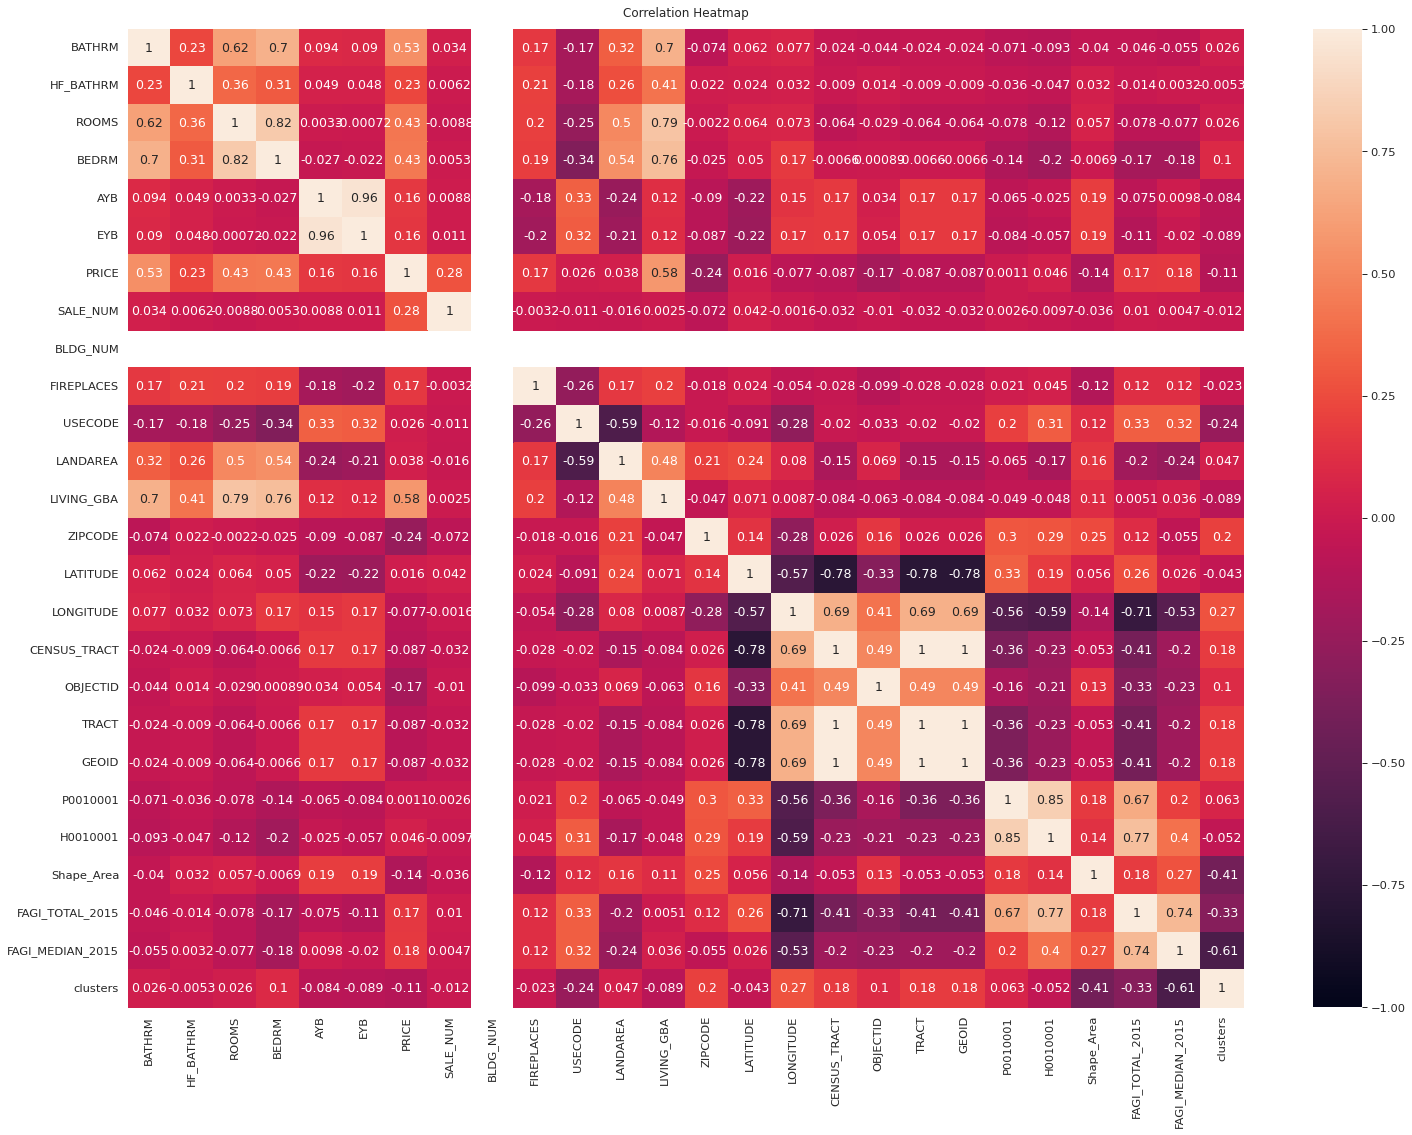

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(25, 18))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_condo.corr('spearman'), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
df_cond_pca1 = df_condo[['BATHRM','ROOMS','BEDRM','LANDAREA','LIVING_GBA','PRICE']]

In [ ]:
df_cond_pca1['PRICE_LOG'] = df_cond_pca1.apply(lambda x : log10(x['PRICE']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_cond_pca1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36004 entries, 49336 to 85339
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BATHRM      36004 non-null  int64  
 1   ROOMS       36004 non-null  int64  
 2   BEDRM       36004 non-null  int64  
 3   LANDAREA    36004 non-null  int64  
 4   LIVING_GBA  36004 non-null  float64
 5   PRICE       36004 non-null  float64
 6   PRICE_LOG   36004 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.2 MB


In [ ]:
X = df_cond_pca1.loc[:, ['BATHRM','ROOMS','BEDRM','LANDAREA']].values
y = df_cond_pca1.loc[:,['PRICE_LOG']].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
new_df = pd.DataFrame(data = X_std, columns = ['BATHRM','ROOMS','BEDRM','LANDAREA'])
new_df.head()

,BATHRM,ROOMS,BEDRM,LANDAREA
0,1.212986,0.266902,0.747866,0.434914
1,1.212986,0.266902,0.747866,0.696328
2,1.212986,0.266902,0.747866,0.530902
3,1.212986,0.266902,0.747866,0.434914
4,1.212986,0.266902,0.747866,0.857670


In [ ]:
from sklearn.decomposition import PCA

pca_condo1 = PCA(n_components=2)
pcs_condo1 = pca_condo1.fit_transform(X_std)

pdf_condo1 = pd.DataFrame(data = pcs_condo1, columns = ['pc1','pc2'])

pdf_condo1.head()

,pc1,pc2
0,1.319061,-0.356239
1,1.424411,-0.134025
2,1.357744,-0.274645
3,1.319061,-0.356239
4,1.489431,0.003122


In [ ]:
pdf_condo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36004 entries, 0 to 36003
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     36004 non-null  float64
 1   pc2     36004 non-null  float64
dtypes: float64(2)
memory usage: 562.7 KB


In [ ]:
print('Explained variance:', pca_condo1.explained_variance_)
print('Explained variance ratio:', pca_condo1.explained_variance_ratio_)

Explained variance: [2.74065529 0.70728793]
Explained variance ratio: [0.68514479 0.17681707]


In [ ]:
df_cond_pca2 = df_condo[['LATITUDE','CENSUS_TRACT','TRACT','GEOID', 'LONGITUDE','PRICE']]

In [ ]:
df_cond_pca2['PRICE_LOG'] = df_cond_pca1.apply(lambda x : log10(x['PRICE']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_cond_pca2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36004 entries, 49336 to 85339
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LATITUDE      36004 non-null  float64
 1   CENSUS_TRACT  36004 non-null  float64
 2   TRACT         36004 non-null  int64  
 3   GEOID         36004 non-null  int64  
 4   LONGITUDE     36004 non-null  float64
 5   PRICE         36004 non-null  float64
 6   PRICE_LOG     36004 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 2.2 MB


In [ ]:
X = df_cond_pca2.loc[:, ['LATITUDE','CENSUS_TRACT','TRACT','GEOID']].values
y = df_cond_pca2.loc[:,['PRICE_LOG']].values

In [ ]:
X_std = StandardScaler().fit_transform(X)

In [ ]:
new_df = pd.DataFrame(data = X_std, columns = ['LATITUDE','CENSUS_TRACT','TRACT','GEOID'])
new_df.head()

,LATITUDE,CENSUS_TRACT,TRACT,GEOID
0,0.957516,-0.567332,-0.567332,-0.567332
1,0.957516,-0.567332,-0.567332,-0.567332
2,0.957516,-0.567332,-0.567332,-0.567332
3,0.957516,-0.567332,-0.567332,-0.567332
4,0.957516,-0.567332,-0.567332,-0.567332


In [ ]:
pca_condo2 = PCA(n_components=2)
pcs_condo2 = pca_condo2.fit_transform(X_std)

pdf_condo2 = pd.DataFrame(data = pcs_condo2, columns = ['pc1','pc2'])

pdf_condo2.head()

,pc1,pc2
0,-1.295854,0.450772
1,-1.295854,0.450772
2,-1.295854,0.450772
3,-1.295854,0.450772
4,-1.295854,0.450772


In [ ]:
pdf_condo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36004 entries, 0 to 36003
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     36004 non-null  float64
 1   pc2     36004 non-null  float64
dtypes: float64(2)
memory usage: 562.7 KB


In [ ]:
print('Explained variance:', pca_condo2.explained_variance_)
print('Explained variance ratio:', pca_condo2.explained_variance_ratio_)

Explained variance: [3.56084502 0.43926608]
Explained variance ratio: [0.89018653 0.10981347]


In [ ]:
df_cond_pca3 = df_condo[['P0010001','LONGITUDE','H0010001','FAGI_TOTAL_2015','PRICE']]

In [ ]:
df_cond_pca3['PRICE_LOG'] = df_cond_pca3.apply(lambda x : log10(x['PRICE']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_cond_pca3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36004 entries, 49336 to 85339
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P0010001         36004 non-null  int64  
 1   LONGITUDE        36004 non-null  float64
 2   H0010001         36004 non-null  int64  
 3   FAGI_TOTAL_2015  36004 non-null  float64
 4   PRICE            36004 non-null  float64
 5   PRICE_LOG        36004 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.9 MB


In [ ]:
X = df_cond_pca3.loc[:, ['P0010001','LONGITUDE','H0010001','FAGI_TOTAL_2015']].values
y = df_cond_pca3.loc[:,['PRICE_LOG']].values

In [ ]:
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = ['P0010001','LONGITUDE','H0010001','FAGI_TOTAL_2015'])
new_df.head()

,P0010001,LONGITUDE,H0010001,FAGI_TOTAL_2015
0,0.544825,0.310974,-0.532007,-0.596589
1,0.544825,0.310974,-0.532007,-0.596589
2,0.544825,0.310974,-0.532007,-0.596589
3,0.544825,0.310974,-0.532007,-0.596589
4,0.544825,0.310974,-0.532007,-0.596589


In [ ]:
pca_cond3 = PCA(n_components=2)
pcs_condo3 = pca_cond3.fit_transform(X_std)

pdf_condo3 = pd.DataFrame(data = pcs_condo3, columns = ['pc1','pc2'])

pdf_condo3.head()

,pc1,pc2
0,-0.430361,-0.350569
1,-0.430361,-0.350569
2,-0.430361,-0.350569
3,-0.430361,-0.350569
4,-0.430361,-0.350569


In [ ]:
print('Explained variance:', pca_cond3.explained_variance_)
print('Explained variance ratio:', pca_cond3.explained_variance_ratio_)

Explained variance: [2.89382836 0.63002545]
Explained variance ratio: [0.723437   0.15750199]


In [ ]:
df_condo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36004 entries, 49336 to 85339
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   BATHRM              36004 non-null  int64         
 1   HF_BATHRM           36004 non-null  int64         
 2   HEAT                36004 non-null  object        
 3   AC                  36004 non-null  object        
 4   ROOMS               36004 non-null  int64         
 5   BEDRM               36004 non-null  int64         
 6   AYB                 35988 non-null  float64       
 7   EYB                 36004 non-null  int64         
 8   SALEDATE            36004 non-null  datetime64[ns]
 9   PRICE               36004 non-null  float64       
 10  QUALIFIED           36004 non-null  object        
 11  SALE_NUM            36004 non-null  int64         
 12  BLDG_NUM            36004 non-null  int64         
 13  FIREPLACES          36004 non-null  int64 

In [ ]:
df_condo_concat = pd.concat([pdf_condo1,pdf_condo2,pdf_condo3,df_cond_pca1[['PRICE_LOG']],df_condo[['LONGITUDE','LATITUDE','EYB','LANDAREA','clusters']]],axis=1)
df_condo_concat.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','PRICE_LOG','LONGITUDE','LATITUDE','EYB','LANDAREA','clusters']

In [ ]:
dfc1 = df_cond_pca1[['PRICE_LOG']].reset_index().drop('index',axis=1)
dfc2 = df_condo[['LONGITUDE']].reset_index().drop('index',axis=1)
dfc3 =df_condo[['LATITUDE']].reset_index().drop('index',axis=1)
dfc4 = df_condo[['EYB']].reset_index().drop('index',axis=1)
dfc5 = df_condo[['LANDAREA']].reset_index().drop('index',axis=1)
dfc6 = df_condo[['clusters']].reset_index().drop('index',axis=1)

df_condo_concat = pd.concat([pdf_condo1,pdf_condo2,pdf_condo3,dfc1,dfc2,dfc3,dfc4,dfc5,dfc6],axis=1)
df_condo_concat.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','PRICE_LOG','LONGITUDE','LATITUDE','EYB','LANDAREA','clusters']

In [ ]:
df_condo_concat

,pc1,pc2,pc3,pc4,pc5,pc6,PRICE_LOG,LONGITUDE,LATITUDE,EYB,LANDAREA,clusters
0,1.319061,-0.356239,-1.295854,0.450772,-0.430361,-0.350569,5.778079,-77.021312,38.933606,1919,716,3
1,1.424411,-0.134025,-1.295854,0.450772,-0.430361,-0.350569,5.831166,-77.021312,38.933606,1919,844,3
2,1.357744,-0.274645,-1.295854,0.450772,-0.430361,-0.350569,5.819478,-77.021312,38.933606,1919,763,3
3,1.319061,-0.356239,-1.295854,0.450772,-0.430361,-0.350569,5.809560,-77.021312,38.933606,1919,716,3
4,1.489431,0.003122,-1.295854,0.450772,-0.430361,-0.350569,5.839415,-77.021312,38.933606,1919,923,3
...,...,...,...,...,...,...,...,...,...,...,...,...
35999,3.322638,-1.919796,-0.018047,-0.037879,-1.755792,0.555094,5.589950,-77.019420,38.911840,1938,502,1
36000,-1.125666,0.276801,-0.018047,-0.037879,-1.755792,0.555094,5.601951,-77.019420,38.911840,1938,394,1
36001,0.229203,0.253521,-0.018047,-0.037879,-1.755792,0.555094,5.619093,-77.019420,38.911840,1938,506,1
36002,1.114124,-0.788513,-0.018047,-0.037879,-1.755792,0.555094,5.778151,-77.019420,38.911840,1920,467,1


In [ ]:
df_condo_concat

,pc1,pc2,pc3,pc4,pc5,pc6,PRICE_LOG,LONGITUDE,LATITUDE,EYB,LANDAREA,clusters
0,1.319061,-0.356239,-1.295854,0.450772,-0.430361,-0.350569,5.778079,-77.021312,38.933606,1919,716,3
1,1.424411,-0.134025,-1.295854,0.450772,-0.430361,-0.350569,5.831166,-77.021312,38.933606,1919,844,3
2,1.357744,-0.274645,-1.295854,0.450772,-0.430361,-0.350569,5.819478,-77.021312,38.933606,1919,763,3
3,1.319061,-0.356239,-1.295854,0.450772,-0.430361,-0.350569,5.809560,-77.021312,38.933606,1919,716,3
4,1.489431,0.003122,-1.295854,0.450772,-0.430361,-0.350569,5.839415,-77.021312,38.933606,1919,923,3
...,...,...,...,...,...,...,...,...,...,...,...,...
35999,3.322638,-1.919796,-0.018047,-0.037879,-1.755792,0.555094,5.589950,-77.019420,38.911840,1938,502,1
36000,-1.125666,0.276801,-0.018047,-0.037879,-1.755792,0.555094,5.601951,-77.019420,38.911840,1938,394,1
36001,0.229203,0.253521,-0.018047,-0.037879,-1.755792,0.555094,5.619093,-77.019420,38.911840,1938,506,1
36002,1.114124,-0.788513,-0.018047,-0.037879,-1.755792,0.555094,5.778151,-77.019420,38.911840,1920,467,1


In [ ]:
df_condo_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36004 entries, 0 to 36003
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pc1        36004 non-null  float64
 1   pc2        36004 non-null  float64
 2   pc3        36004 non-null  float64
 3   pc4        36004 non-null  float64
 4   pc5        36004 non-null  float64
 5   pc6        36004 non-null  float64
 6   PRICE_LOG  36004 non-null  float64
 7   LONGITUDE  36004 non-null  float64
 8   LATITUDE   36004 non-null  float64
 9   EYB        36004 non-null  int64  
 10  LANDAREA   36004 non-null  int64  
 11  clusters   36004 non-null  int32  
dtypes: float64(9), int32(1), int64(2)
memory usage: 3.2 MB


In [ ]:
df_condo_concat.isna().sum()

pc1          0
pc2          0
pc3          0
pc4          0
pc5          0
pc6          0
PRICE_LOG    0
LONGITUDE    0
LATITUDE     0
EYB          0
LANDAREA     0
clusters     0
dtype: int64

##### Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_condo_concat.drop(['PRICE_LOG'],axis=1), 
                                                    df_condo_concat['PRICE_LOG'], test_size=0.3, random_state=101)

In [ ]:
r2=[]
model = {'RandomForest' : RandomForestRegressor(),
         'Decision Tree' : DecisionTreeRegressor(),
         'KNN' : KNeighborsRegressor(),
        # 'SVM' : SVR(),
         'Extra Tree' : ExtraTreesRegressor(),
         'Gradient Boosting Regression' : GradientBoostingRegressor(),
         'XGBoost' : XGBRegressor()
         }
result={}
for key,value in model.items():
    
    model = value
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2.append(r2_score(y_test, y_pred))
    result[key]=mse
    print('{}: {}'.format(key, mean_squared_error(y_test, y_pred)))

RandomForest: 0.019062778879122375
Decision Tree: 0.024607591851830576
KNN: 0.026702577784779698
Extra Tree: 0.02095692121735322
Gradient Boosting Regression: 0.020596622272101236
[15:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost: 0.0207513108931032


In [ ]:
base_model = pd.DataFrame(result.items(), columns=['Model', 'MSE'])
base_model['r2'] = r2
base_model = base_model.sort_values('MSE', ascending=True).reset_index(drop=True)
base_model['RMSE']=base_model['MSE']**0.5
base_model


,Model,MSE,r2,RMSE
0,RandomForest,0.019063,0.605530,0.138068
1,Gradient Boosting Regression,0.020597,0.573789,0.143515
2,XGBoost,0.020751,0.570588,0.144053
3,Extra Tree,0.020957,0.566334,0.144765
4,Decision Tree,0.024608,0.490790,0.156868
5,KNN,0.026703,0.447438,0.163409


# Conclusion

After Data Cleansing Conducted , we would cluster our data into 4 cluster based on the demographic of the location.
<br>

Our cluster would become one of our variables. Two different models are constructed based on the type of residental source.

<br>

For Residential , the most optimal model is Random Forest with RMSE of 0.190469 and R2 Score of 0.505698	

<br>

For Condominium , the most optimal model is Random Forest with RMSE of 0.138068 and R2 Score of 0.605530	